<a href="https://colab.research.google.com/github/Minoo-eml/Statistical_Model_datascience/blob/main/unistatistical2_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ** 6 ---------------------------------**

In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import sklearn
from scipy import stats,signal
from datetime import datetime
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_theme()

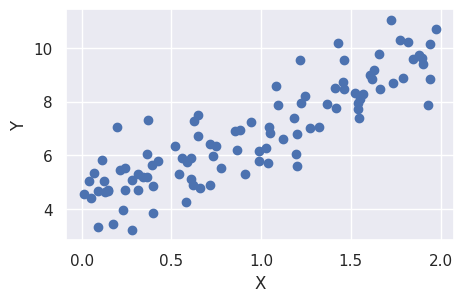

In [ ]:
# Initialize x- and y- coordinates (XA and yA) of 100 points from a uniform and gaussian distribution
np.random.seed(42)
XA = 2*np.random.rand(100,1)
yA = 4+3*XA+np.random.randn(100,1)

# Visualize the points on a scatter plot
plt.figure(figsize=(5, 3))
plt.scatter(XA, yA)
plt.xlabel('X')
plt.ylabel('Y');

In [ ]:
# Add a column of 1's (100x1) to the instances of XA, before performing the calculations directly on the XA data.
# This corresponds adding a column for the regression intercept
ones = np.array(np.ones((100,1)))
X = np.concatenate((ones,XA), axis=1)
#Compact alternative: X = sm.add_constant(XA)
print('Dimension X:', X.shape)
print('------')
print(X[:10])



Dimension X: (100, 2)
------
[[1.         0.74908024]
 [1.         1.90142861]
 [1.         1.46398788]
 [1.         1.19731697]
 [1.         0.31203728]
 [1.         0.31198904]
 [1.         0.11616722]
 [1.         1.73235229]
 [1.         1.20223002]
 [1.         1.41614516]]


In [ ]:
# Compute the parameters of the line to fit, solving directly the matrices
A = np.linalg.inv(np.dot(X.T,X)) # remember: np.dot-for 2D arrays is the matrix product
B = np.dot(A,X.T)
beta = np.dot(B,yA)

# The same operations but more efficiently
beta_best = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(yA)
print('Intercept:', float(beta_best[0]))
print('Slope:', float(beta_best[1]))

Intercept: 4.21509615754675
Slope: 2.7701133864384806


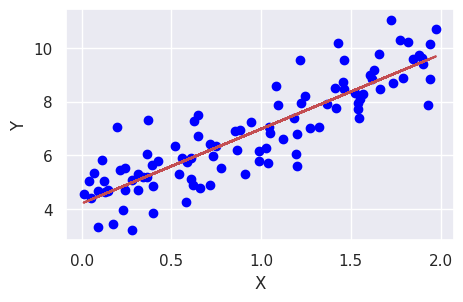

In [ ]:
# We can now calculate the predicted Y from XA by using the coefficients just estimated, and visualize on a figure
# the scatter plot of the original data and the line of best fit
y_fit = np.dot(X,beta_best) # or: y_fit = beta_best[0] + beta_best[1]*XA

plt.figure(figsize=(5, 3))
plt.scatter(XA, yA, color='blue')
plt.plot(XA,y_fit,'r-')
plt.xlabel('X')
plt.ylabel('Y');

In [ ]:
# Alternative approach: solve directly the Normal Equation rather than inverting the X matrix
num = np.dot((XA - np.mean(XA)).T, yA-np.mean(yA))
den = sum((XA - np.mean(XA))**2)
beta_1 = num/den
beta_0 = np.mean(yA) - beta_1*np.mean(XA)

print('Intercept manual:', float(beta_0))
print('Slope manual:', float(beta_1))


Intercept manual: 4.215096157546746
Slope manual: 2.770113386438485


Intercept: 4.215096157546747
Slope: 2.7701133864384837


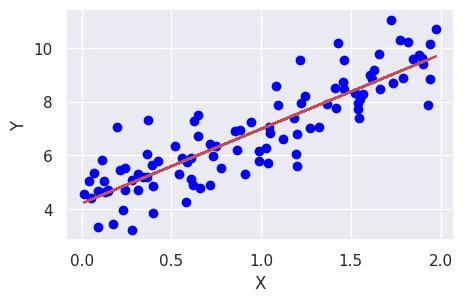

In [ ]:
# We can re-run the simple linear regression by taking advantage of scikit-learn library
# LinearRegression() --> Ordinary least squares Linear Regression
lin_reg = LinearRegression(fit_intercept=True) # default is True
lin_reg.fit(XA,yA) # Note: the column of the constant term (1's) is automatically added when using 'fit_intercept=True'
print('Intercept:', float(lin_reg.intercept_))
print('Slope:', float(lin_reg.coef_))

# Remember: in scikit-learn, the attributes of the model that store the learned parameters have always an underscore at the end of the name.
# This applies to all algorithms in sklearn, not only to linear regression.

# As before, we can calculate the predicted y values and visualize on a figure
y_fit = lin_reg.predict(XA)
plt.figure(figsize=(5, 3))
plt.scatter(XA, yA, color='blue')
plt.plot(XA,y_fit,'r-')
plt.xlabel('X')
plt.ylabel('Y');

Dim X: (100, 5)
Dim y: (100, 1)
Dim samples: (100,)


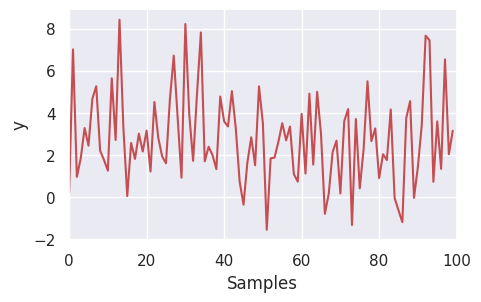

In [ ]:
# Multiple Linear Regression
np.random.seed(42)

X = np.random.rand(100,5)
y = 2 + X[:,0] - 3*X[:,1] +0.25*X[:,2] - X[:,3] +5*X[:,4] + np.random.randn(1,100)
y = y.T
print('Dim X:', X.shape)
print('Dim y:',y.shape)

samples = np.arange(0,len(X)).reshape(len(X))
print('Dim samples:', samples.shape)
plt.figure(figsize=(5, 3))
plt.plot(samples.T,y,'r-')
plt.xlim([0, len(X)])
plt.xlabel('Samples')
plt.ylabel('y');

-------------
Intercept: 2.237211937493547
Beta coefficients: [ 0.73705069 -3.42456794  0.71306669 -0.96173763  4.68577644]


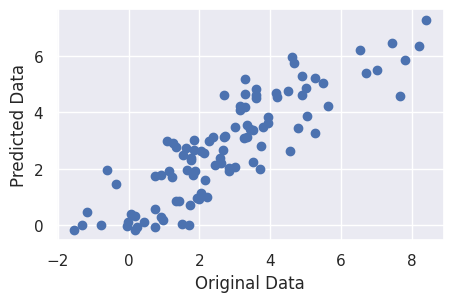

In [ ]:
# Perform a linear fitting and predict the values
lin_reg = LinearRegression(fit_intercept=True)
lin_fit = lin_reg.fit(X, y) # Important note: only column vector is accepted
# y.shape: (100,1)
# X.shape: (100,5)
y_fit = lin_fit.predict(X) # y_fit.shape: (100,1)

# Visualize original data (y) and the predicted ones (y_fit) on the same figure
plt.figure(figsize=(5, 3))
plt.scatter(y,y_fit)
plt.xlabel('Original Data')
plt.ylabel('Predicted Data');

print('-------------')
print('Intercept:', float(lin_reg.intercept_))
print('Beta coefficients:', *(lin_reg.coef_))


In [ ]:
# MSE, MAE, MAPE and R2 (Manual implementation)
def MSE(true, predicted):
  mse_val = sum((true-predicted)**2)/len(predicted)
  return(mse_val)

def MAE(true, predicted):
  mae_val = sum(abs(true-predicted))/len(predicted)
  return(mae_val)

def MAPE(true, predicted):
  mape_val = np.mean(np.abs((true - predicted)/true)) * 100
  return(mape_val)

def R2(true, predicted):
  r2_val = 1-(sum((true-predicted)**2)/sum((true-np.mean(true))**2))
  return(r2_val)

r2_value = R2(y,y_fit)
mse_value = MSE(y,y_fit)
mae_value = MAE(y,y_fit)
mape_value = MAPE(y,y_fit)
print('Manual R2 score:', float(r2_value))
print('Manual MSE value:', float(mse_value))
print('Manual RMSE value:', float(np.sqrt(mse_value)))
print('Manual MAPE value:', float(mape_value))
print('Manual MAE value:', float(mae_value))

# MSE, MAE, MAPE and R2 (Automatic implementation)
print('---------------------')
print('Scikit-Learn R2 score:', r2_score(y, y_fit))
print('Scikit-Learn MSE value:', mean_squared_error(y, y_fit))
print('Scikit-Learn MAE value:', mean_absolute_error(y, y_fit))
print('Scikit-Learn MAPE value:', 100*mean_absolute_percentage_error(y,y_fit))

# Note: To account for the number of predictors, we can use the adjusted R2 score
adj_R2 = 1-(1-r2_value)*((X.shape[0]-1)/(X.shape[0]-X.shape[1]-1))
print('---------------------')
print('Adjusted R2 score is', adj_R2) # considers number of observations and number of independent variables

Manual R2 score: 0.7501735929125338
Manual MSE value: 1.1238097339597848
Manual RMSE value: 1.0600989264968552
Manual MAPE value: 60.93614663052536
Manual MAE value: 0.8607390918310223
---------------------
Scikit-Learn R2 score: 0.7501735929125337
Scikit-Learn MSE value: 1.1238097339597848
Scikit-Learn MAE value: 0.8607390918310223
Scikit-Learn MAPE value: 60.93614663052536
---------------------
Adjusted R2 score is [0.73688495]


In [ ]:
# Additional parameters for assessing model performance: AIC and BIC
N  = len(y)  #N = T, number of points
n_params = X.shape[1] #k, number of parameters
error = sum((y-y_fit)**2)

# Calculate AIC for regression
s2 = error/N
LL  = -N/2*(1+np.log(2*np.pi)+np.log(s2))
aic = -2*LL + 2*(n_params+1)
print('Manual AIC:', float(aic))

# Calculate BIC for regression
bic = -2*LL + (n_params+1)*np.log(N) # different penalty for the number of parameters compared to AIC
print('Manual BIC:',float(bic))

Manual AIC: 307.4601527715583
Manual BIC: 323.09117388748683


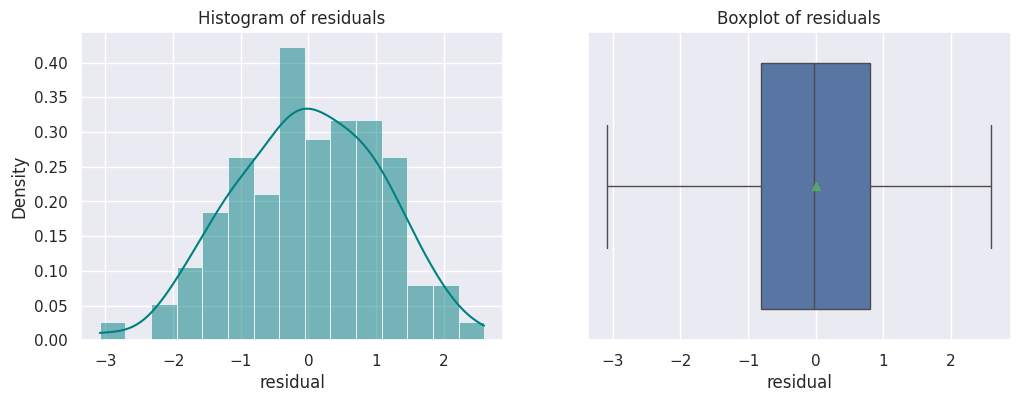

In [ ]:
# Calculate residuals (errors)
residuals = y_fit - y
residuals = residuals.reshape(-1) # from (100,1) to (100,), to avoid issues in the visualization

# Histogram and distribution of the residuals --> to check whether they are normally distributed
fig, ax = plt.subplots(1,2,figsize=(12,4))
sns.histplot(x=residuals,ax=ax[0], stat='density', linewidth=0.5, kde=True,color='teal',bins=15)
ax[0].set(title='Histogram of residuals', xlabel='residual');

sns.boxplot(ax=ax[1], x=residuals,showmeans=True);
ax[1].set(title='Boxplot of residuals', xlabel='residual');

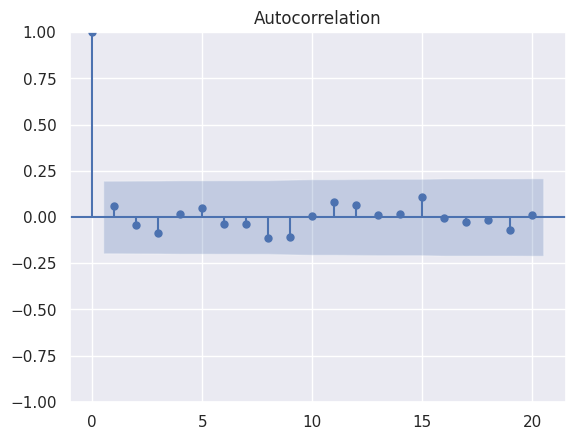

In [ ]:
# ACF plot of residuals --> there should be no autocorrelation in the errors (residuals)
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(residuals, lags=20);

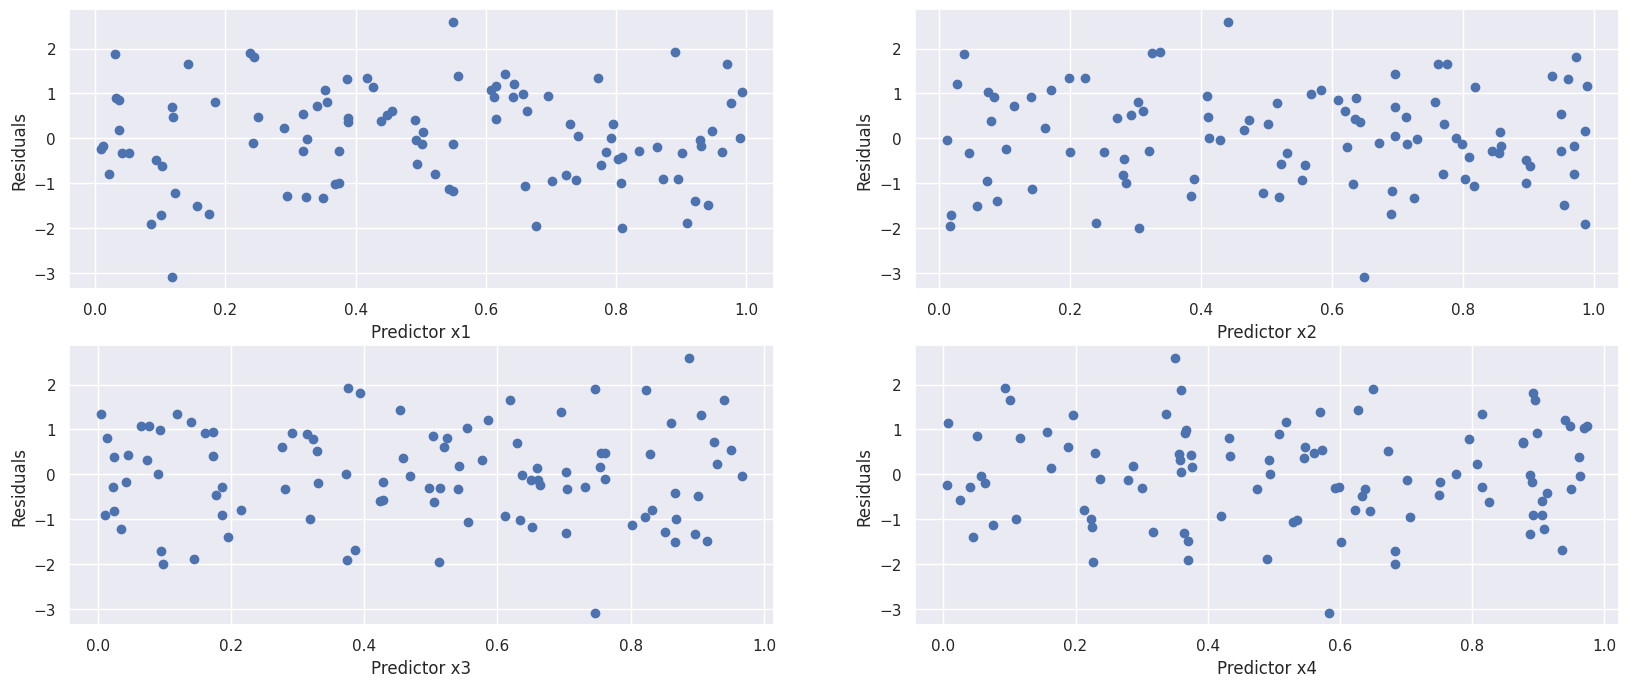

In [ ]:
# Residual plots against predictors --> we would expect the residuals to be randomly scattered without showing any systematic pattern.
# A simple and quick way to check this is to examine scatterplots of the residuals against each of the predictor variables.
fig, ax = plt.subplots(2,2,figsize=(20,8))
ax[0,0].scatter(X[:,0],residuals)
ax[0,0].set_xlabel('Predictor x1')
ax[0,0].set_ylabel('Residuals');

ax[0,1].scatter(X[:,1],residuals)
ax[0,1].set_xlabel('Predictor x2')
ax[0,1].set_ylabel('Residuals');

ax[1,0].scatter(X[:,2],residuals)
ax[1,0].set_xlabel('Predictor x3')
ax[1,0].set_ylabel('Residuals');

ax[1,1].scatter(X[:,3],residuals)
ax[1,1].set_xlabel('Predictor x4')
ax[1,1].set_ylabel('Residuals');


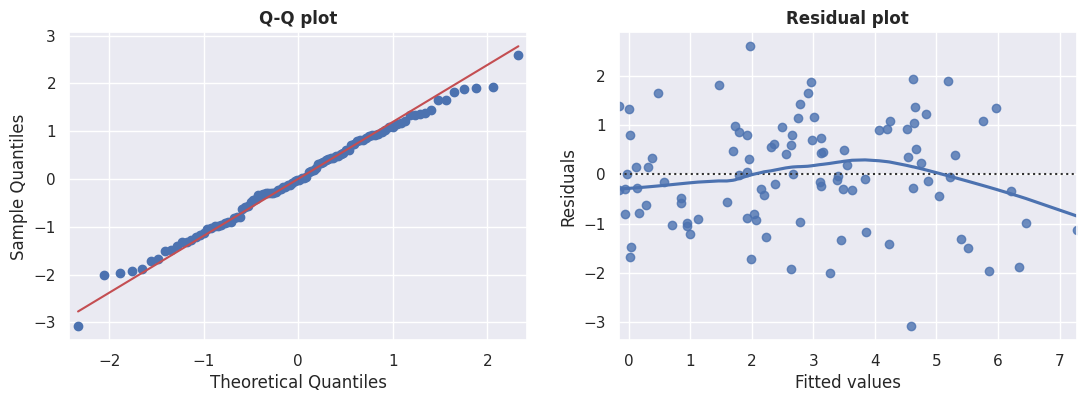

In [ ]:
# Q-Q plot and Residuals vs Fitted plot
fig, ax = plt.subplots(1,2,figsize=(13,4))
sm.qqplot(residuals,line='q',ax=ax[0]);
ax[0].set_title('Q-Q plot', weight='bold')

sns.residplot(y=residuals, x=y_fit,lowess=True,ax=ax[1]) # option lowess: Fit a lowess smoother to the residual scatterplot
ax[1].set(ylabel='Residuals',xlabel='Fitted values');
ax[1].set_title('Residual plot', weight='bold');
# OR: plt.scatter(y_fit,residuals)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     56.45
Date:                Thu, 18 Jan 2024   Prob (F-statistic):           8.09e-27
Time:                        13:54:49   Log-Likelihood:                -147.73
No. Observations:                 100   AIC:                             307.5
Df Residuals:                      94   BIC:                             323.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.2372      0.462      4.845      0.0

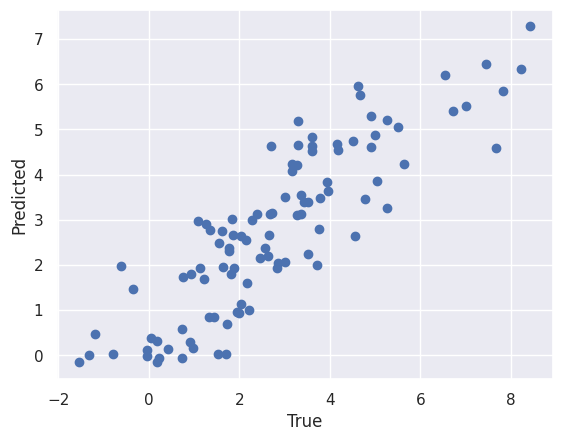

In [ ]:
# Important Note: to run a linear regression, we can use the OLS() in statsmodels directly.
# OLS is also very useful when backward elimination (stepwise regression) has to be implemented

X = sm.add_constant(X) # we have to manually add the column of 1's when using OLS()
results = sm.OLS(y, X).fit()
print(results.summary())

y_fit_ols = results.predict(X)
print('------------------')
print('First five predicted values:', y_fit_ols[:5])

plt.scatter(y,y_fit_ols)
plt.xlabel('True')
plt.ylabel('Predicted');

In [ ]:
# Alternative predictions from OLS() function
predictions = results.get_prediction(X) # by default this is performed using X
df_predictions = predictions.summary_frame()
df_predictions

mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
0  -0.065242  0.231192      -0.524280       0.393796     -2.284230   
1   5.510673  0.299857       4.915300       6.106046      3.259527   
2   0.172225  0.284928      -0.393506       0.737957     -2.071264   
3   2.653895  0.206277       2.244327       3.063463      0.444611   
4   4.203489  0.200121       3.806144       4.600834      1.996438   
..       ...       ...            ...            ...           ...   
95  4.630196  0.310982       4.012733       5.247659      2.373107   
96  2.777010  0.152263       2.474688       3.079332      0.585073   
97  6.203653  0.302437       5.603156       6.804150      3.951146   
98  2.639023  0.201120       2.239695       3.038351      0.431614   
99  4.238361  0.303424       3.635906       4.840816      1.985332   

    obs_ci_upper  
0       2.153745  
1       7.761819  
2       2.415714  
3       4.863179  
4       6.410540  
..           ...  
95      6.887285  
96      4.968947  
97      8.456160  
98      4.846432  
99      6.491391  

[100 rows x 6 columns]

## **Example**

In [3]:
# Import the data from the csv
data = pd.read_csv('/content/abalone.csv')

# Substitute the categorical data (Sex) with binary integers values
m,n = data.shape
for i in range(0,m):
  if(data.iloc[i,0] == "M"):
    data.iloc[i,0] = 0
  else:
    data.iloc[i,0] = 1

data = data.astype(float)
display(data)

Sex  Length  Diameter  Height  Whole_weight  Shucked_weight  \
0     0.0   0.455     0.365   0.095        0.5140          0.2245   
1     0.0   0.350     0.265   0.090        0.2255          0.0995   
2     1.0   0.530     0.420   0.135        0.6770          0.2565   
3     0.0   0.440     0.365   0.125        0.5160          0.2155   
4     1.0   0.330     0.255   0.080        0.2050          0.0895   
...   ...     ...       ...     ...           ...             ...   
4172  1.0   0.565     0.450   0.165        0.8870          0.3700   
4173  0.0   0.590     0.440   0.135        0.9660          0.4390   
4174  0.0   0.600     0.475   0.205        1.1760          0.5255   
4175  1.0   0.625     0.485   0.150        1.0945          0.5310   
4176  0.0   0.710     0.555   0.195        1.9485          0.9455   

      Viscera_weight  Shell_weight  Rings  
0             0.1010        0.1500   15.0  
1             0.0485        0.0700    7.0  
2             0.1415        0.2100    9.0  
3             0.1140        0.1550   10.0  
4             0.0395        0.0550    7.0  
...              ...           ...    ...  
4172          0.2390        0.2490   11.0  
4173          0.2145        0.2605   10.0  
4174          0.2875        0.3080    9.0  
4175          0.2610        0.2960   10.0  
4176          0.3765        0.4950   12.0  

[4177 rows x 9 columns]

In [4]:
# Example 1 - Simulated scenario, with time dummy
# A time dummy variable given by 'var = t, t = 1,2, ...T' could represent a simple linear trend
start = datetime(2020, 1, 1)
end = datetime(2020, 12, 31)
index = pd.date_range(start, end)

# Creating the simulated dataframe
multiple = 5
l = list(range(0, len(index)*multiple, multiple))
df = pd.DataFrame(l, index = index)
df.index.name = 'date'
df.columns = ['value']
display(df)

value
date             
2020-01-01      0
2020-01-02      5
2020-01-03     10
2020-01-04     15
2020-01-05     20
...           ...
2020-12-27   1805
2020-12-28   1810
2020-12-29   1815
2020-12-30   1820
2020-12-31   1825

[366 rows x 1 columns]

In [5]:
df['days'] = (range(df.shape[0]))
df['days'] = df['days']+1
display(df)

value  days
date                   
2020-01-01      0     1
2020-01-02      5     2
2020-01-03     10     3
2020-01-04     15     4
2020-01-05     20     5
...           ...   ...
2020-12-27   1805   362
2020-12-28   1810   363
2020-12-29   1815   364
2020-12-30   1820   365
2020-12-31   1825   366

[366 rows x 2 columns]

In [6]:
# Regression with the time dummy just created. We need first to prepare the data before linear regression
x = df['days'].values
y = df['value'].values

x = x.reshape(len(x),1) # (366,1)
y = y.reshape(len(y),1) # (366,1)

model = LinearRegression().fit(x, y)
fitted_values = model.predict(x)
print(model.intercept_, model.coef_)

[-5.] [[5.]]


In [7]:
# Example 2 - Real scenario, with time dummy
df = pd.read_csv('/content/book_sales.csv', na_values='',sep=',', parse_dates=['Date'], index_col=['Date'])
df.drop('Paperback',axis=1,inplace=True)

display(df.head(5))
print('Dimensions:', df.shape)

Hardcover
Date                 
2000-04-01        139
2000-04-02        128
2000-04-03        172
2000-04-04        139
2000-04-05        191

Dimensions: (30, 1)


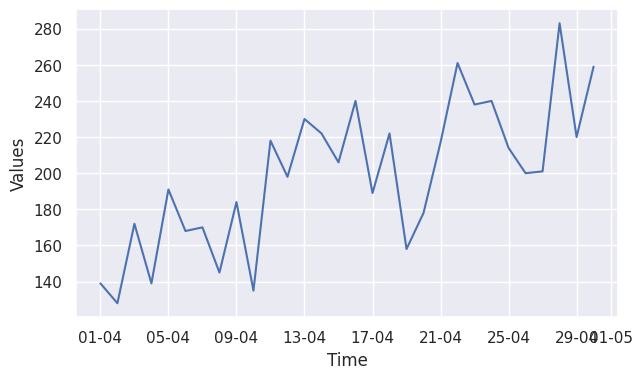

In [8]:
# Visualise the time series
from matplotlib.dates import DateFormatter

date_form = DateFormatter('%d-%m')
fig, ax = plt.subplots(figsize=(7,4))
plt.plot(df.index,df['Hardcover'])
ax.xaxis.set_major_formatter(date_form)
ax.set_xlabel('Time')
ax.set_ylabel('Values');


In [9]:
# Derive the time dummy representing the days as before
df['days'] = range(df.shape[0])
df['days'] = df['days']+1
df.head(5)

Hardcover  days
Date                       
2000-04-01        139     1
2000-04-02        128     2
2000-04-03        172     3
2000-04-04        139     4
2000-04-05        191     5

Intercept 147.2091954022989
Slope 3.330589543937707


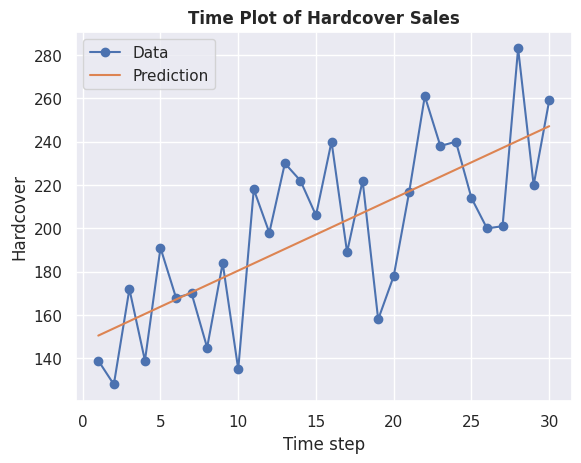

In [10]:
# Regression with the time dummy just created
x = df['days'].values
y = df['Hardcover'].values

x = x.reshape(len(x),1)
y = y.reshape(len(y),1)

model = LinearRegression().fit(x, y)
fitted_values = model.predict(x)
print('Intercept', float(model.intercept_))
print('Slope', float(model.coef_))

plt.plot(x, y, marker='o',label='Data')
plt.grid()
plt.title('Time Plot of Hardcover Sales',weight='bold');
plt.plot(x,fitted_values,label='Prediction');
plt.xlabel('Time step')
plt.ylabel('Hardcover')
plt.grid()
plt.legend();

In [11]:
# Example 3 - Real scenario, with conversion of the dates
# Data are related to the stock prices of two companies and their relative changes
data = pd.read_csv('/content/relative_price_change.csv', na_values='',sep=',', parse_dates=['date'], index_col='date')
display(data)

# Convert dates to the corresponding Gregorian ordinal value
A = data.index.map(datetime.toordinal) # datetime to ordinal, it returns the days after 01/01/01
X = A
print('Type X:', type(X))
display(X[:5])


relative_price_change
date                             
2020-01-02               1.000000
2020-01-03               0.994549
2020-01-06               0.999416
2020-01-07               1.004152
2020-01-08               1.002922
...                           ...
2021-04-14               1.185811
2021-04-15               1.189689
2021-04-16               1.187527
2021-04-19               1.182488
2021-04-20               1.185515

[327 rows x 1 columns]

Type X: <class 'pandas.core.indexes.numeric.Int64Index'>


Int64Index([737426, 737427, 737430, 737431, 737432], dtype='int64', name='date')

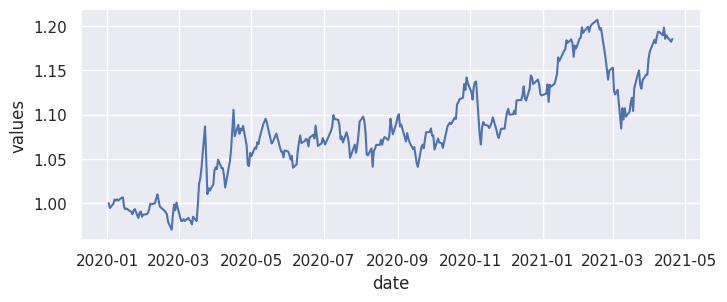

In [12]:
# Visualise the data
plt.figure(figsize=(8,3))
plt.plot(data.index,data['relative_price_change'],'b-')
plt.xlabel('date')
plt.ylabel('values');


In [13]:
# Prepare the data before linear regression
X = np.array(X)
N = len(X)
X = X.reshape((N,1))

y = data['relative_price_change'].values # dimension is (327,)
y = y.reshape(N,1)

print('X dimension',X.shape)
print('y dimension',y.shape)

X dimension (327, 1)
y dimension (327, 1)


In [14]:
# Apply linear regression
reg = LinearRegression().fit(X, y)
slope = reg.coef_
intercept = reg.intercept_
print('Slope is:', float(slope))
print('Intercept is: ', float(intercept))

fitted_values = reg.predict(X)

Slope is: 0.00037777831001577016
Intercept is:  -277.5897688815931


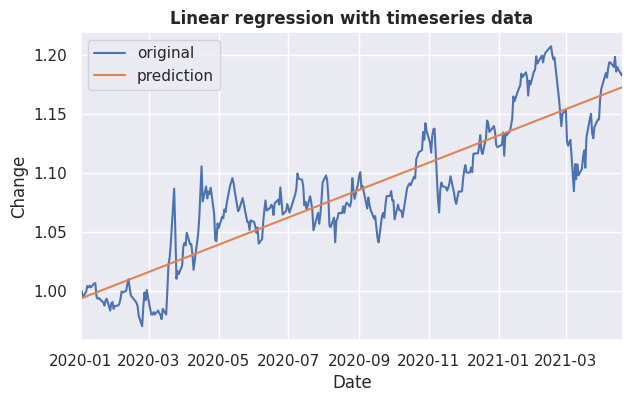

In [15]:
# Visualize the results in a graph
plt.figure(figsize=(7, 4))
plt.plot(data.index, y, label='original')
plt.plot(data.index, fitted_values, label='prediction')
plt.xlabel('Date')
plt.ylabel('Change')
plt.title('Linear regression with timeseries data',weight='bold')
plt.xlim([pd.to_datetime('2020-01-01'), pd.to_datetime('2021-04-20')])
plt.legend(loc='best');

In [16]:
# Example 5 - Real historical data on investment-grade corporate bond defaults
# IGD = Default rate on investment-grade corporate bonds
# AGE = Percentage of investment-grade bond issuers
# BBB = Percentage of investment-grade bond issuers with a Standard & Poor's credit rating of BBB, the lowest investment grade
# CPF = Change in corporate profits, adjusted for inflation
# SPR = Spread between corporate bond yields and those of comparable government bonds

data = pd.read_csv('/content/IGD_pred.csv', na_values='',sep=',', parse_dates=['DataTable_Dates'], index_col='DataTable_Dates')
display(data.shape)

X = data['CPF'].values.reshape(len(data),1)
y = data['IGD'].values.reshape(len(data),1)

(21, 5)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.247
Model:                            OLS   Adj. R-squared:                  0.207
Method:                 Least Squares   F-statistic:                     6.220
Date:                Wed, 07 Feb 2024   Prob (F-statistic):             0.0220
Time:                        14:44:48   Log-Likelihood:                 19.862
No. Observations:                  21   AIC:                            -35.72
Df Residuals:                      19   BIC:                            -33.63
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1319      0.025      5.200      0.0

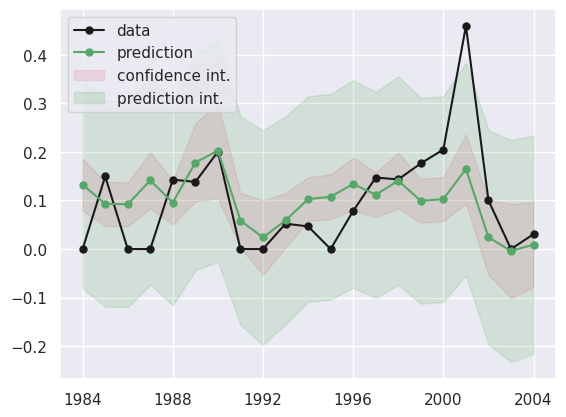

In [17]:
# Linear regression directly with OLS() function
X = sm.add_constant(X)
results = sm.OLS(y,X).fit()
print(results.summary())
predictions = results.get_prediction(X) # default: X
df_predictions = predictions.summary_frame()

# Visualization with confidence intervals
plt.plot(data.index, y, 'ko-',markersize =5, label='data')
plt.plot(data.index, df_predictions['mean'],'go-',markersize =5,label='prediction')
plt.fill_between(data.index, df_predictions.mean_ci_lower, df_predictions.mean_ci_upper, alpha=.1, color='crimson', label = 'confidence int.')
plt.fill_between(data.index, df_predictions.obs_ci_lower, df_predictions.obs_ci_upper, alpha=.1, color='green',label='prediction int.')
plt.legend(loc='best');

In [18]:
# Lag features of predictor variable
data['CPF_lag1'] = data['CPF'].shift(1)
X1 = np.concatenate((X,data['CPF_lag1'].values.reshape(len(data),1)), axis=1)
display(data.head(7))

display(X1[0:6])



AGE        BBB       CPF   SPR       IGD  CPF_lag1
DataTable_Dates                                                          
1984-01-01        3.618421  23.273026 -0.057099  1.97  0.000000       NaN
1985-01-01        6.282723  22.587883  3.479844  2.31  0.149589 -0.057099
1986-01-01        8.395802  24.212894  3.578177  2.90  0.000000  3.479844
1987-01-01        5.411416  24.610823 -0.848781  2.41  0.000000  3.578177
1988-01-01       13.142857  23.857143  3.246905  1.50  0.142857 -0.848781
1989-01-01        7.809261  24.187975 -4.160720  1.92  0.138217  3.246905
1990-01-01        7.553476  24.532086 -6.351784  2.32  0.200535 -4.160720

array([[ 1.        , -0.05709854,         nan],
       [ 1.        ,  3.47984395, -0.05709854],
       [ 1.        ,  3.57817702,  3.47984395],
       [ 1.        , -0.8487813 ,  3.57817702],
       [ 1.        ,  3.24690492, -0.8487813 ],
       [ 1.        , -4.16072041,  3.24690492]])

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.300
Model:                            OLS   Adj. R-squared:                  0.218
Method:                 Least Squares   F-statistic:                     3.642
Date:                Wed, 07 Feb 2024   Prob (F-statistic):             0.0483
Time:                        14:45:40   Log-Likelihood:                 19.586
No. Observations:                  20   AIC:                            -33.17
Df Residuals:                      17   BIC:                            -30.18
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1441      0.027      5.301      0.0

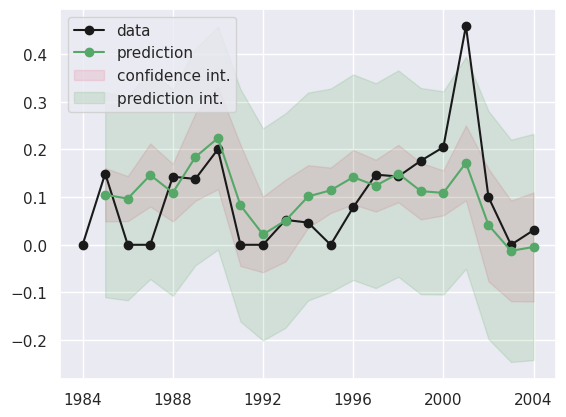

In [19]:
# Fitting
results = sm.OLS(y, X1,missing='drop').fit() # to cope with the NaN
print(results.summary())
predictions = results.get_prediction(X1)
df_predictions = predictions.summary_frame()

# Visualization with confidence intervals
plt.plot(data.index, y,'ko-', label='data')
plt.plot(data.index, df_predictions['mean'],'go-',label='prediction')
plt.fill_between(data.index, df_predictions.mean_ci_lower, df_predictions.mean_ci_upper, alpha=.1, color='crimson',label='confidence int.')
plt.fill_between(data.index, df_predictions.obs_ci_lower, df_predictions.obs_ci_upper, alpha=.1, color='green',label='prediction int.')
plt.legend();

# ** 8 ---------------------------------------**

In [23]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import sklearn
from scipy import stats,signal
from sklearn.linear_model import LinearRegression
from datetime import datetime
from statsmodels.tsa.exponential_smoothing.ets import ETSModel
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.stats.diagnostic import acorr_ljungbox
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.stats.stattools import durbin_watson
import warnings
warnings.filterwarnings("ignore")

pollution_today        dew       temp        press     wnd_spd  \
date                                                                         
2010-01-02       145.958333  -8.500000  -5.125000  1024.750000   24.860000   
2010-01-03        78.833333 -10.125000  -8.541667  1022.791667   70.937917   
2010-01-04        31.333333 -20.875000 -11.500000  1029.291667  111.160833   
2010-01-05        42.458333 -24.583333 -14.458333  1033.625000   56.920000   
2010-01-06        56.416667 -23.708333 -12.541667  1033.750000   18.511667   
...                     ...        ...        ...          ...         ...   
2014-12-27       238.666667  -9.666667  -1.791667  1027.833333    9.278333   
2014-12-28       197.375000 -10.791667   1.583333  1019.958333   10.948750   
2014-12-29       159.000000 -12.333333   0.750000  1013.750000    8.000000   
2014-12-30        46.083333 -13.916667   1.875000  1019.125000    9.778333   
2014-12-31        10.041667 -21.791667  -1.916667  1032.125000  167.458333   

                 snow  rain  pollution_yesterday  
date                                              
2010-01-02   0.708333   0.0            10.041667  
2010-01-03  14.166667   0.0           145.958333  
2010-01-04   0.000000   0.0            78.833333  
2010-01-05   0.000000   0.0            31.333333  
2010-01-06   0.000000   0.0            42.458333  
...               ...   ...                  ...  
2014-12-27   0.000000   0.0           170.250000  
2014-12-28   0.000000   0.0           238.666667  
2014-12-29   0.000000   0.0           197.375000  
2014-12-30   0.000000   0.0           159.000000  
2014-12-31   0.000000   0.0            46.083333  

[1825 rows x 8 columns]

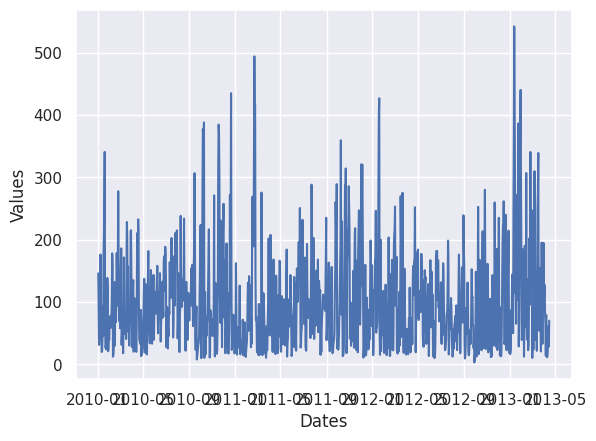

In [20]:
# Example 1: Rolling statistics and ACF plots on Air pollution dataset (daily data)
data = pd.read_csv('/content/air_pollution.csv',sep=',',parse_dates=['date'], index_col='date')
data = data.asfreq('D')
display(data)

plt.plot(data['pollution_today'].iloc[:1200])
plt.xlabel('Dates')
plt.ylabel('Values');

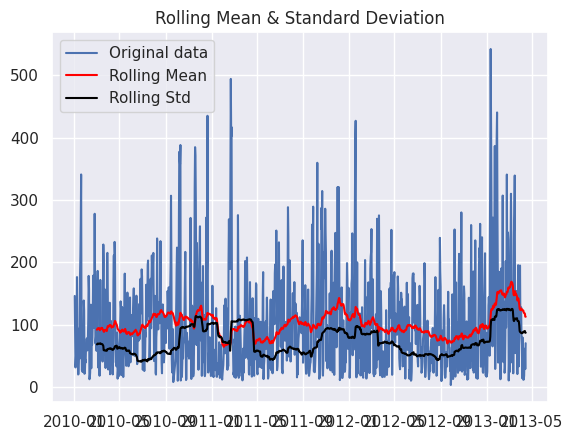

In [21]:
series_air = data['pollution_today'].iloc[:1200]

# Rolling statistics
rolling_mean = series_air.rolling(60).mean()
rolling_std = series_air.rolling(60).std()
plt.plot(series_air, label='Original data')
plt.plot(rolling_mean, color='red', label='Rolling Mean')
plt.plot(rolling_std, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation');

# Rolling mean and std have a constant behaviour over the years, indeed even if they change over the year this behaviour is then repeated next year.
# This hints towards stationarity


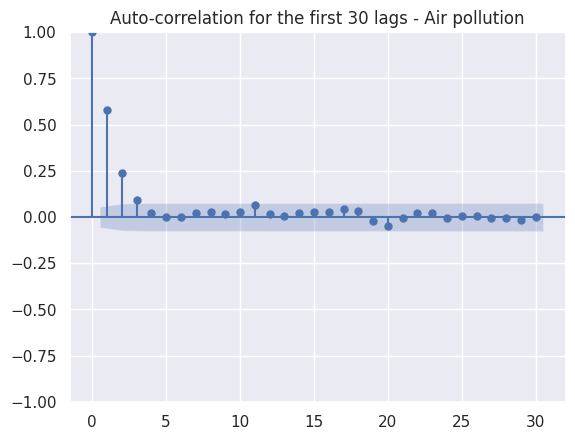

In [24]:
# ACF plot

plot_acf(series_air, lags=30, title='Auto-correlation for the first 30 lags - Air pollution');

# The time series values seem not to be correlated with distant points in time, suggesting the series should be stationary

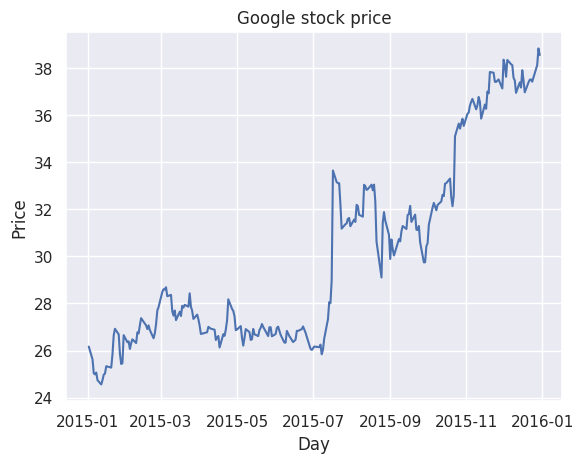

In [25]:
# Example 2: ACF plots on Google stock price
!pip install yfinance
import yfinance as yf

data = yf.download(tickers='GOOG', start='2015-01-01', end='2015-12-31', interval='1d', progress=False)
data.head(7)

series_google = data['Adj Close']
plt.plot(data.index, series_google)
plt.title('Google stock price')
plt.xlabel('Day')
plt.ylabel('Price');

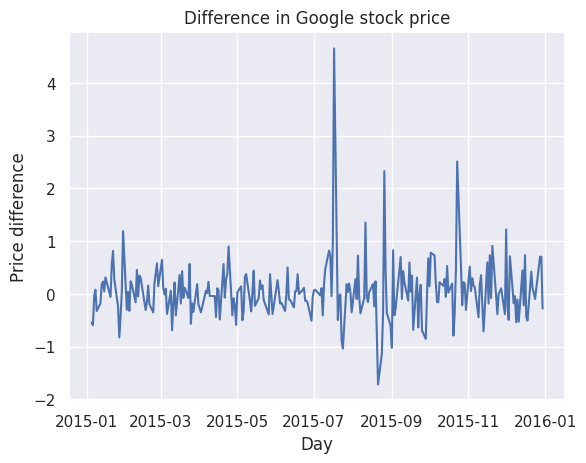

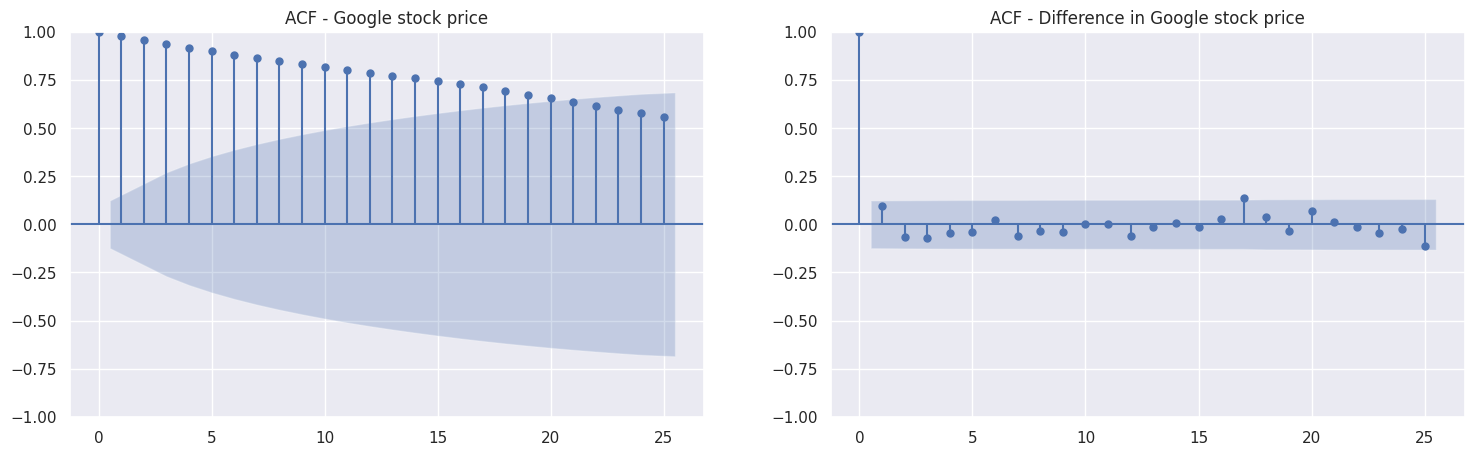

In [26]:
# First order differencing
data['difference1'] = series_google.diff()
data.dropna(inplace=True)
plt.plot(data.index, data['difference1'])
plt.title('Difference in Google stock price')
plt.xlabel('Day')
plt.ylabel('Price difference');

# ACF plot
fig, ax = plt.subplots(1,2,figsize=(18,5))
plot_acf(series_google, lags=25, title='ACF - Google stock price', ax=ax[0]);
plot_acf(data['difference1'], lags=25, title='ACF - Difference in Google stock price', ax=ax[1]);


In [27]:
# ADF on the different data from previous examples

def adfuller_test(data):
  adf_test = adfuller(data,autolag='AIC') # AIC is the default option
  print('ADF Statistic:', adf_test[0])
  print('p-value: ', adf_test[1])
  print('Critical Values:')
  for key, value in adf_test[4].items():
      print('\t%s: %.3f' % (key, value))
  if adf_test[1] <= 0.05:
    print('We can reject the null hypothesis (H0) --> data is stationary')
  else:
    print('We cannot reject the null hypothesis (H0) --> data is non-stationary')


print('ADF on Google stock price')
adfuller_test(series_google)
print('--------------------------------------')
print('ADF on differenced Google stock price')
adfuller_test(data['difference1'])
print('--------------------------------------')
print('ADF on air pollution')
adfuller_test(series_air)

# p > 0.05 --> We cannot reject the null hypothesis (H0), meaning data the data has a unit root and is non-stationary.
# p <= 0.05 --> We reject the null hypothesis (H0), meaning data the data has not a unit root and is stationary.

ADF on Google stock price
ADF Statistic: -0.2912006104917516
p-value:  0.9267413763665766
Critical Values:
	1%: -3.457
	5%: -2.873
	10%: -2.573
We cannot reject the null hypothesis (H0) --> data is non-stationary
--------------------------------------
ADF on differenced Google stock price
ADF Statistic: -14.31655588075362
p-value:  1.1602534300651305e-26
Critical Values:
	1%: -3.457
	5%: -2.873
	10%: -2.573
We can reject the null hypothesis (H0) --> data is stationary
--------------------------------------
ADF on air pollution
ADF Statistic: -18.35036775354231
p-value:  2.2371434294521816e-30
Critical Values:
	1%: -3.436
	5%: -2.864
	10%: -2.568
We can reject the null hypothesis (H0) --> data is stationary


In [28]:
# KPSS on the different data from previous examples
# Note: "regression" represents the null hypothesis for the KPSS test. There are two options:
# “c” : The data is stationary around a constant (default).
# “ct” : The data is stationary around a trend

def kpss_test(data):
  kpss_out = kpss(data,regression='c', nlags='auto', store=True)
  print('KPSS Statistic:', kpss_out[0])
  print('p-value: ', kpss_out[1])
  if kpss_out[1] <= 0.05:
    print('We can reject the null hypothesis (H0) --> data is not trend stationary')
  else:
    print('We cannot reject the null hypothesis (H0) --> data is trend stationary')


print('KPSS on Google stock price')
kpss_test(series_google)
print('--------------------------------------')
print('KPSS on differenced Google stock price')
kpss_test(data['difference1'])
print('--------------------------------------')
print('KPSS on air pollution')
kpss_test(series_air)


KPSS on Google stock price
KPSS Statistic: 1.9873208368045
p-value:  0.01
We can reject the null hypothesis (H0) --> data is not trend stationary
--------------------------------------
KPSS on differenced Google stock price
KPSS Statistic: 0.11358874933889403
p-value:  0.1
We cannot reject the null hypothesis (H0) --> data is trend stationary
--------------------------------------
KPSS on air pollution
KPSS Statistic: 0.12413312433312634
p-value:  0.1
We cannot reject the null hypothesis (H0) --> data is trend stationary


value
date                  
1961-01-01  232.288994
1962-01-01  229.536258
1963-01-01  233.145936
1964-01-01  243.763684
1965-01-01  252.602916

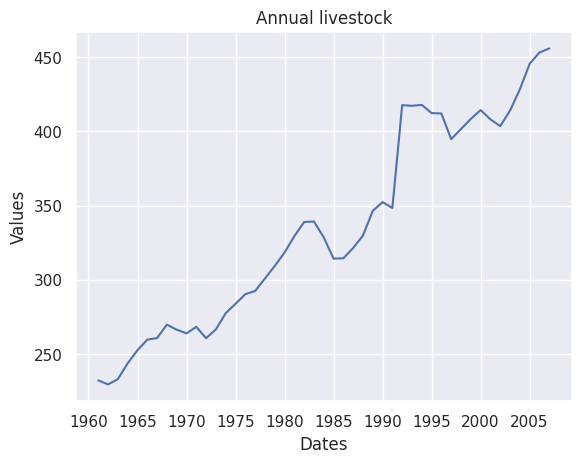

In [30]:
# Additional considerations on the options "c" and "ct" for KPSS
# Example on livestock dataset
data = pd.read_csv('/content/livestock.csv',sep=',',parse_dates=['date'])
data = data.set_index('date')
display(data.head(5))
plt.plot(data['value'])
plt.xlabel('Dates')
plt.ylabel('Values')
plt.title('Annual livestock');

# It appears to be a steady increasing trend overall -> we expect this series to be stationary around the trend (trend stationary)

In [31]:
# ADF test
adf_test = adfuller(data['value'],autolag='AIC')
print('ADF Statistic:', adf_test[0])
print('p-value - ADF: ', adf_test[1])

# p > 0.05 --> We reject the null hypothesis, meaning the data is not-stationary, as expected from the plot

ADF Statistic: -0.2383837252991012
p-value - ADF:  0.9337890318823665


In [32]:
# KPSS test option 1
kpss_test = kpss(data['value'], regression='c', nlags='auto', store=True)
print('KPSS Statistic - c:', kpss_test[0])
print('p-value - c: ', kpss_test[1])

# p < 0.05 --> We reject the null hypothesis, meaning the data is not trend-stationary.
# This because the "c" option tests for stationarity around a ‘mean’ only.

KPSS Statistic - c: 1.026377056837458
p-value - c:  0.01


In [33]:
# KPSS test option 2
kpss_test = kpss(data['value'], regression='ct', nlags='auto', store=True)
print('KPSS Statistic - ct:', kpss_test[0])
print('p-value - ct: ', kpss_test[1])

# p > 0.05 --> We can not reject the null hypothesis, meaning the data is trend stationary.

KPSS Statistic - ct: 0.0667931394982902
p-value - ct:  0.1


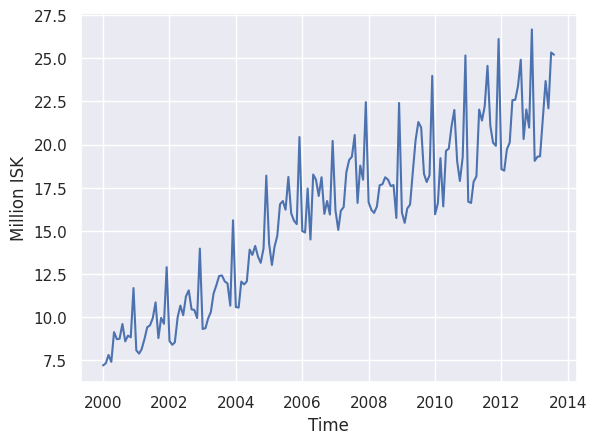

In [34]:
# Retail debit card usage in Iceland - Dataset from R
debcard_dataset = sm.datasets.get_rdataset('debitcards', 'fpp2')
debcard = pd.Series(debcard_dataset.data['value'])
debcard.index = pd.date_range(start = '2000-01', periods = len(debcard), freq = "M").to_period()
debcard.index = debcard.index.to_timestamp()
plt.plot(debcard)
plt.xlabel('Time')
plt.ylabel('Million ISK');


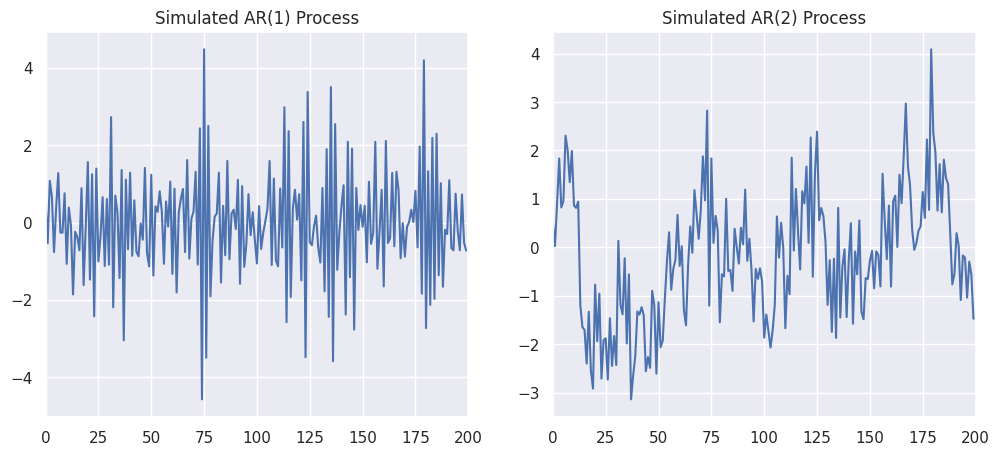

In [35]:
from statsmodels.tsa.arima_process import ArmaProcess

# Example 1 - Simulate AR(1) process with AR coefficient -0.8
np.random.seed(42)
ar1 = np.array([1, 0.8])
ma1 = np.array([1, 0])

AR1_process = ArmaProcess(ar1, ma1)
simulated_AR1_data = AR1_process.generate_sample(nsample=200)

fig,axes = plt.subplots(1,2,figsize=(12,5))
axes[0].plot(simulated_AR1_data)
axes[0].set_xlim(0,200)
axes[0].set_title('Simulated AR(1) Process');


# Example 2 - Simulate AR(2) process with AR coefficients 0.33 and 0.5
np.random.seed(42)
ar2 = np.array([1, -0.33, -0.5])
ma2 = np.array([1, 0, 0])

AR2_process = ArmaProcess(ar2, ma2)
simulated_AR2_data = AR2_process.generate_sample(nsample=200)

axes[1].plot(simulated_AR2_data)
axes[1].set_xlim(0,200)
axes[1].set_title('Simulated AR(2) Process');



In [36]:
# Check stationarity
print('AR1 is stationary:', AR1_process.isstationary)
print('AR2 is stationary:', AR2_process.isstationary)

# ADF and KPSS
adf_test = adfuller(simulated_AR1_data,autolag='AIC')
kpss_test = kpss(simulated_AR1_data, regression='ct', nlags='auto', store=True)
print('ADF p-value AR1: ', adf_test[1])
print('KPSS p-value AR1: ', kpss_test[1])

adf_test = adfuller(simulated_AR2_data,autolag='AIC')
kpss_test = kpss(simulated_AR2_data, regression='ct', nlags='auto', store=True)
print('ADF p-value AR2: ', adf_test[1])
print('KPSS p-value AR2: ', kpss_test[1])


AR1 is stationary: True
AR2 is stationary: True
ADF p-value AR1:  4.006408986756165e-27
KPSS p-value AR1:  0.1
ADF p-value AR2:  0.043264367668591354
KPSS p-value AR2:  0.1


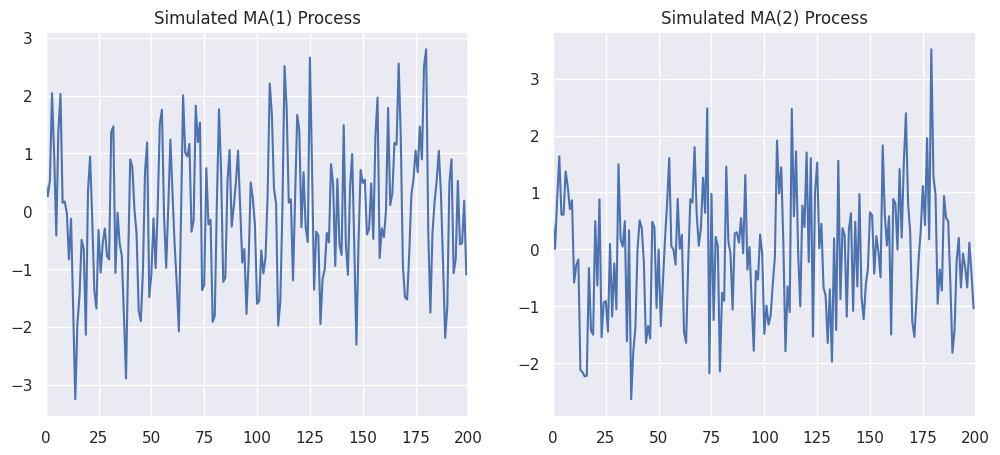

In [37]:
# Example 3 - Simulate MA(1) process with coefficients 0.8
# Differently from AR, the sign of the MA coefficients is what we would expect
np.random.seed(42)
ma1 = np.array([1, 0.8])
ar1 = np.array([1, 0, 0])

MA1_process = ArmaProcess(ar1, ma1)
simulated_MA1_data = MA1_process.generate_sample(nsample=200)

fig,axes = plt.subplots(1,2,figsize=(12,5))
axes[0].plot(simulated_MA1_data)
axes[0].set_xlim(0,200)
axes[0].set_title('Simulated MA(1) Process');


# Example 4 - Simulate MA(2) process with coefficients 0.3 and 0.6
np.random.seed(42)
ma2 = np.array([1, 0.3, 0.6])
ar2 = np.array([1, 0, 0])

MA2_process = ArmaProcess(ar2, ma2)
simulated_MA2_data = MA2_process.generate_sample(nsample=200)

axes[1].plot(simulated_MA2_data)
axes[1].set_xlim(0,200)
axes[1].set_title('Simulated MA(2) Process');



In [38]:
# Check stationarity
print('MA1 is stationary:', MA1_process.isstationary)
print('MA2 is stationary:', MA2_process.isstationary)

# ADF and KPSS
adf_test = adfuller(simulated_MA1_data,autolag='AIC')
kpss_test = kpss(simulated_MA1_data, regression='ct', nlags='auto', store=True)
print('ADF p-value MA1: ', adf_test[1])
print('KPSS p-value MA1: ', kpss_test[1])

adf_test = adfuller(simulated_MA2_data,autolag='AIC')
kpss_test = kpss(simulated_MA2_data, regression='ct', nlags='auto', store=True)
print('ADF p-value MA2: ', adf_test[1])
print('KPSS p-value MA2: ', kpss_test[1])

MA1 is stationary: True
MA2 is stationary: True
ADF p-value MA1:  1.0756543244841933e-05
KPSS p-value MA1:  0.1
ADF p-value MA2:  0.0007517828541003385
KPSS p-value MA2:  0.1


ARMA(2,2) is stationary: True
ADF p-value ARMA(2,2):  3.78614057266787e-25
KPSS p-value ARMA(2,2):  0.1


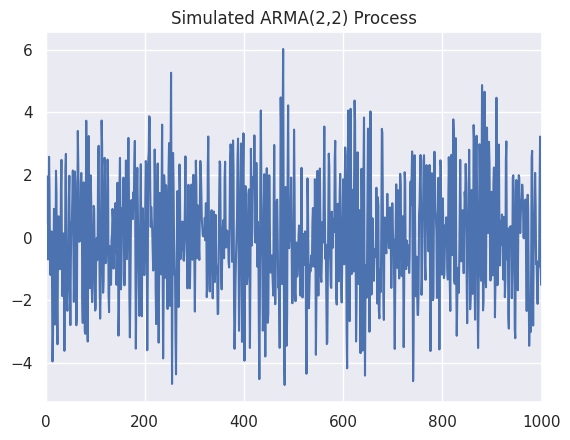

In [39]:
# Example 5 - Simulate ARMA(2,2) process with AR coefficients 0.33 and -0.6, MA coefficients 0.9 and 0.25
np.random.seed(42)
ar2 = np.array([1, -0.33, 0.6])
ma2 = np.array([1, 0.9, 0.25])

ARMA_process = ArmaProcess(ar2, ma2)
simulated_ARMA2_data = ARMA_process.generate_sample(nsample=1000)

plt.plot(simulated_ARMA2_data)
plt.xlim(0,1000)
plt.title('Simulated ARMA(2,2) Process');

# Check stationarity
print('ARMA(2,2) is stationary:', ARMA_process.isstationary)

# ADF and KPSS
adf_test = adfuller(simulated_ARMA2_data,autolag='AIC')
kpss_test = kpss(simulated_ARMA2_data, regression='ct', nlags='auto', store=True)
print('ADF p-value ARMA(2,2): ', adf_test[1])
print('KPSS p-value ARMA(2,2): ', kpss_test[1])


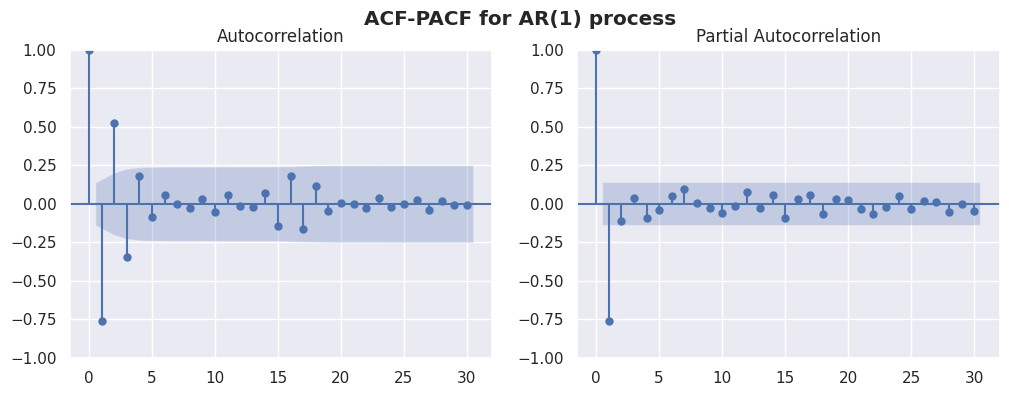

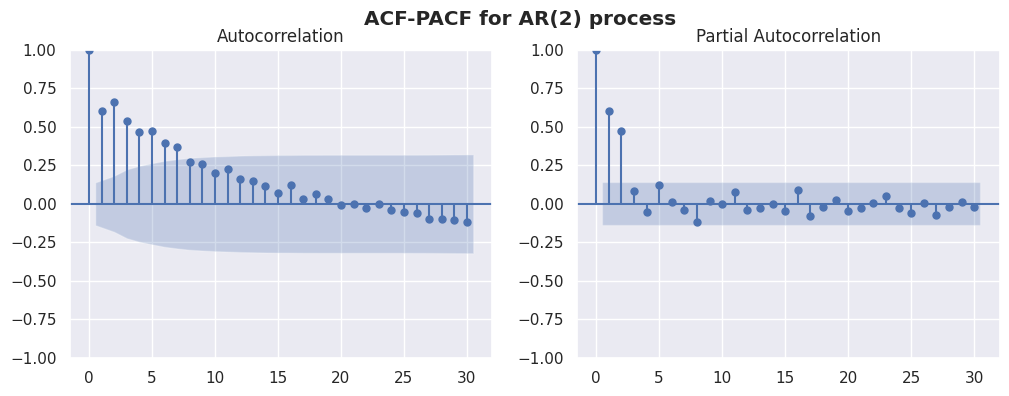

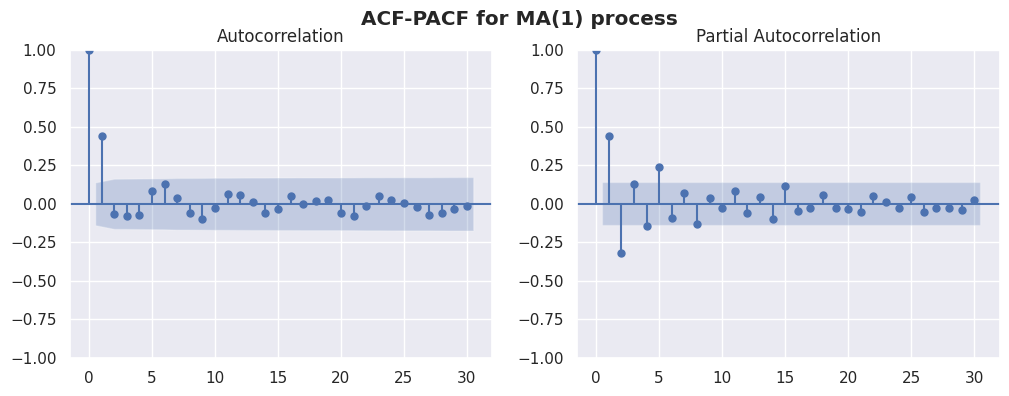

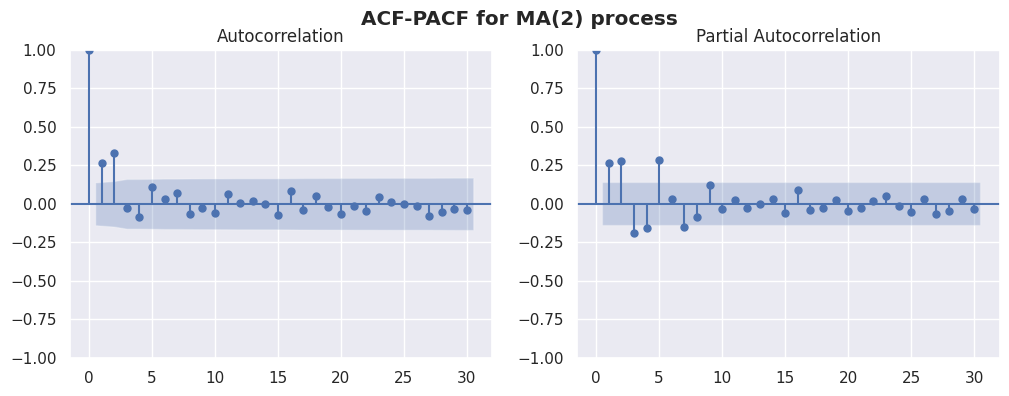

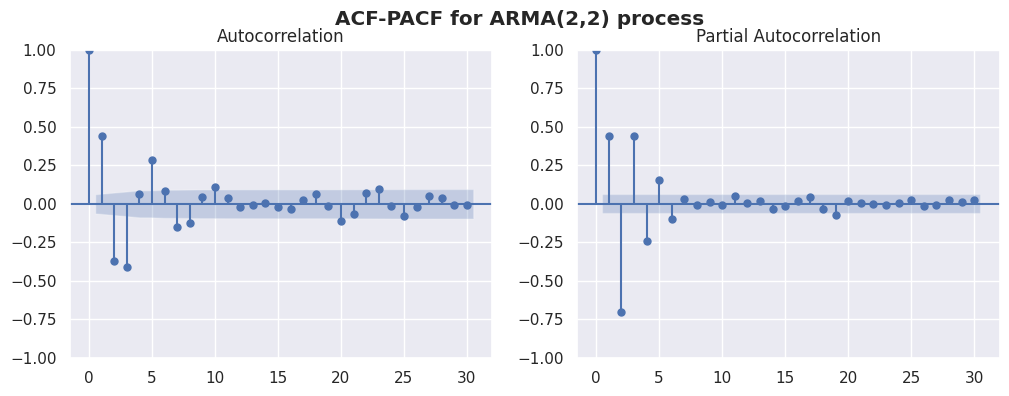

In [40]:
# ACF and PACF plots for the previously simulated data
from statsmodels.graphics.tsaplots import plot_pacf

# Simulated AR(1) process
fig, ax = plt.subplots(1,2,figsize=(12,4))
plot_acf(simulated_AR1_data, lags=30, ax=ax[0])
plot_pacf(simulated_AR1_data, lags=30, ax=ax[1])
plt.suptitle('ACF-PACF for AR(1) process', weight='bold')

# Simulated AR(2) process
fig, ax = plt.subplots(1,2,figsize=(12,4))
plot_acf(simulated_AR2_data, lags=30, ax=ax[0])
plot_pacf(simulated_AR2_data, lags=30, ax=ax[1])
plt.suptitle('ACF-PACF for AR(2) process', weight='bold')

# Simulated MA(1) process
fig, ax = plt.subplots(1,2,figsize=(12,4))
plot_acf(simulated_MA1_data, lags=30, ax=ax[0])
plot_pacf(simulated_MA1_data, lags=30, ax=ax[1])
plt.suptitle('ACF-PACF for MA(1) process', weight='bold')
plt.show();

# Simulated MA(2) process
fig, ax = plt.subplots(1,2,figsize=(12,4))
plot_acf(simulated_MA2_data, lags=30, ax=ax[0])
plot_pacf(simulated_MA2_data, lags=30, ax=ax[1])
plt.suptitle('ACF-PACF for MA(2) process', weight='bold')
plt.show();

# Simulated ARMA(2,2) process
fig, ax = plt.subplots(1,2,figsize=(12,4))
plot_acf(simulated_ARMA2_data, lags=30, ax=ax[0])
plot_pacf(simulated_ARMA2_data, lags=30, ax=ax[1])
plt.suptitle('ACF-PACF for ARMA(2,2) process', weight='bold')
plt.show();

In [41]:
# Further possibility to choose the model parameters - Auto-ARIMA
! pip install pmdarima
from pmdarima.arima import auto_arima

arima_model =  auto_arima(simulated_AR2_data,start_p=0, d=0, start_q=0,
                          max_p=6, max_q=6, m=1, seasonal=False,
                          error_action='warn',trace = True,
                          supress_warnings=True,stepwise = False,
                          random_state=20,information_criterion='aicc')
# m is the period for seasonal differencing --> m=1 means non-seasonal

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 21.8 MB/s eta 0:00:00
 ARIMA(0,0,0)(0,0,0)[0]             : AICC=684.880, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AICC=642.105, Time=0.03 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AICC=586.807, Time=0.05 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AICC=571.920, Time=0.06 sec
 ARIMA(0,0,4)(0,0,0)[0]             : AICC=570.076, Time=0.09 sec
 ARIMA(0,0,5)(0,0,0)[0]             : AICC=565.010, Time=0.14 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AICC=594.024, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AICC=554.485, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AICC=548.999, Time=0.07 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AICC=545.827, Time=0.15 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AICC=547.774, Time=0.13 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AICC=545.034, Time=0.04 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AICC=545.865, Time=0.08 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AICC=547.925, Time=0.10 s

In [42]:
from statsmodels.tsa.arima.model import ARIMA

# Model parameter estimations - AR(2) process with coefficients 0.33 and 0.5
mod_AR2 = ARIMA(simulated_AR2_data, order=(2,0,0)).fit()
# trend option: default is ‘c’ (constant term) for models without integration, and 'n' (no trend) for models with integration.
# Other options for trend are 't' (linear trend) and 'ct' (combination)

# Visualize the statistics and main results
print(mod_AR2.summary()) # To print all the summary results
print('Estimated Coefficients:', mod_AR2.params) # To print only the coefficients

# Note: sigma2 is the variance of the residuals

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  200
Model:                 ARIMA(2, 0, 0)   Log Likelihood                -269.222
Date:                Wed, 07 Feb 2024   AIC                            546.444
Time:                        15:10:52   BIC                            559.637
Sample:                             0   HQIC                           551.783
                                - 200                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2074      0.310     -0.670      0.503      -0.814       0.399
ar.L1          0.3161      0.062      5.106      0.000       0.195       0.437
ar.L2          0.4709      0.065      7.191      0.0

In [43]:
# Ljung-Box Q-Test --> Check for the presence of autocorrelation
LB_AR2 = acorr_ljungbox(mod_AR2.resid, lags=[10], return_df=True) # [] to consider a single lag, otherwise it will return the values for all the lags up to that number
print('LB p-value for residuals', float(LB_AR2['lb_pvalue']))
print('----------------------------')

# Durbin-Watson Test --> Check for the presence of autocorrelation
dw_google = durbin_watson(mod_AR2.resid)
print('DW statistic for residuals:', dw_google)
print('----------------------------')

# Jarque-Bera Test --> Check if the sample data has the skewness and kurtosis matching a normal distribution.
jb_statistic = stats.jarque_bera(mod_AR2.resid)
print('JB p-value for residuals:', jb_statistic.pvalue)

LB p-value for residuals 0.6339843991057805
----------------------------
DW statistic for residuals: 2.0667236118884325
----------------------------
JB p-value for residuals: 0.6762370471419636


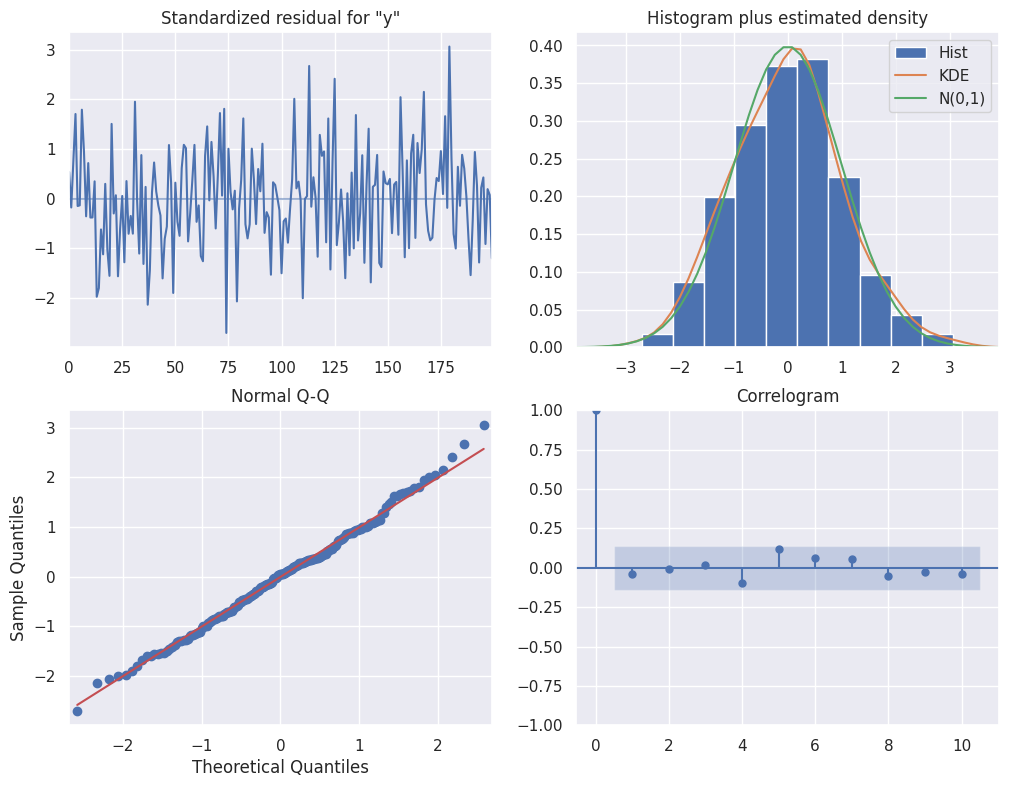

In [44]:
# To automatically visualise different information related to the residuals
mod_AR2.plot_diagnostics(figsize=(12,9));

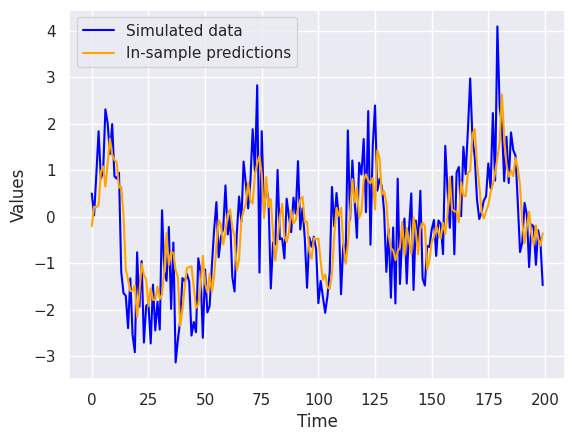

In [45]:
# Plot data with in-sample predictions from ARIMA(2,0,0) model
plt.plot(simulated_AR2_data, color='blue',label='Simulated data')
plt.plot(mod_AR2.fittedvalues, color='orange', label='In-sample predictions')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend();

y      mean   mean_se  mean_ci_lower  mean_ci_upper
0 -0.983169  0.972802      -2.889826       0.923488
1 -0.719109  1.107583      -2.889930       1.451713
2 -0.734499  1.148937      -2.986375       1.517377
3 -0.615005  1.199890      -2.966746       1.736735
4 -0.584480  1.226319      -2.988020       1.819061
5 -0.518555  1.250157      -2.968817       1.931708
6 -0.483339  1.265437      -2.963550       1.996873
7 -0.441159  1.277674      -2.945354       2.063036
8 -0.411241  1.286229      -2.932202       2.109721
9 -0.381918  1.292771      -2.915703       2.151866

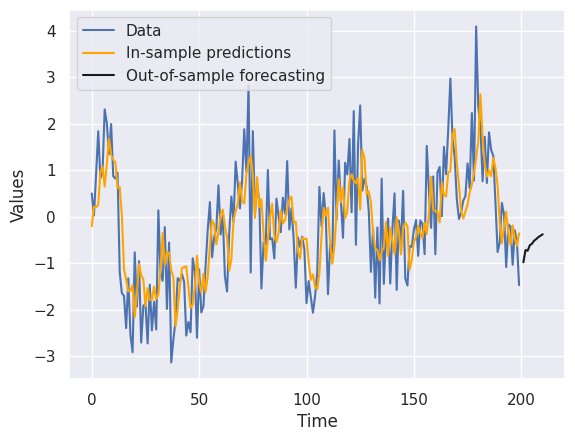

In [46]:
# Forecasting out-of-sample data, 10 points after the end of the time series
prediction_AR2 = mod_AR2.get_prediction(start=201, end=210)
df = prediction_AR2.summary_frame()
display(df)

plt.plot(simulated_AR2_data[:],'-b', label='Data')
plt.plot(mod_AR2.fittedvalues, 'orange', label='In-sample predictions')
plt.plot(list(range(201,211)), df['mean'],'-k',label='Out-of-sample forecasting')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend();

In [47]:
# ##**Exercise 2 - Finding optimal (p,d,q) parameters for ARIMA models**
#In this exercise, we will use another dataset directly imported from R and related to the percentage changes in quarterly personal consumption expenditure, personal disposable income, production, savings and the unemployment rate, starting from January 1960 ('uschange' in fpp2). After having loaded and visualised the data, select the unemployment rate variable and divide the corresponding time series into training and testing sets (last fifteen points as test). Then, the following steps have to be applied:
#1. Once verified whether the training data are stationary or not using appropriate tests, define the optimal parameters (p,d,q) for the ARIMA model. To do so, use both ACF/PACF plots and grid search by optimising the AICc information criterion;
#2. Use the defined ARIMA(p,d,q) optimal model to fit the training data and visualise the diagnostic plot for the residuals;
#3. Perform the forecasting for the test set and visualise the output, including also the in-sample predictions and the 95% CI for the out-of-sample predictions.

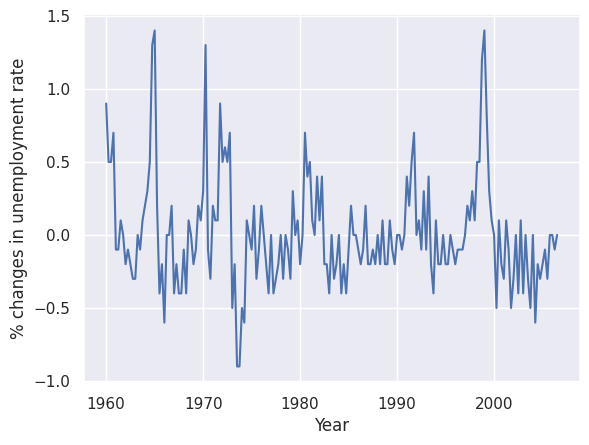

In [48]:
# Percentage changes in quarterly personal consumption expenditure, personal disposable income, production, savings and the unemployment rate for the US - Dataset from R
uschange_dataset = sm.datasets.get_rdataset('uschange', 'fpp2')
unempl = pd.Series(uschange_dataset.data['Unemployment'])
unempl.index = pd.date_range(start = '1960-01', periods = len(unempl), freq = "Q").to_period()
unempl.index = unempl.index.to_timestamp()
plt.plot(unempl)
plt.xlabel('Year')
plt.ylabel('% changes in unemployment rate');

# ** 9 -----------------------**

##**1.2 Seasonal ARIMA**

So far, we have restricted our attention to non-seasonal ARIMA models. However, ARIMA models are also capable of modelling a wide range of seasonal data, and thus can be extended to handle seasonal variations. A seasonal ARIMA model (SARIMA) is made by including additional seasonal terms in the models we have seen so far. Of note, what described in Section 1.1 related to the Box-Jenkins methodology extends also to the seasonal ARIMA models.

These are generally written as **ARIMA(p,d,q)(P,D,Q)m** where the first part *(p,d,q)* refers to the *non-seasonal component*, while the second one *(P,D,Q)m* to the *seasonal component*. The term m refers to the seasonality (e.g., for annual data m = 12, quarterly data m = 4). This is also indicated as S. \\
ACF and PACF plots can help in identifying not only the non-seasonal component but also the seasonal part of an AR or MA model by looking at the seasonal lags of the PACF and ACF. For example:

* *ARIMA(0,0,0)(0,0,1)12*: 1) a significant spike at lag 12 in the ACF but no other significant spikes; 2) exponential decay in the seasonal lags of the PACF (i.e., at lags 12, 24, 36);
* *ARIMA(0,0,0)(1,0,0)12*: 1) exponential decay in the seasonal lags of the ACF; 2) a single significant spike at lag 12 in the PACF.

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import sklearn
from scipy import stats,signal
from sklearn.linear_model import LinearRegression
from datetime import datetime
from statsmodels.tsa.exponential_smoothing.ets import ETSModel
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.stats.diagnostic import acorr_ljungbox
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.stats.stattools import durbin_watson
import warnings
warnings.filterwarnings("ignore")

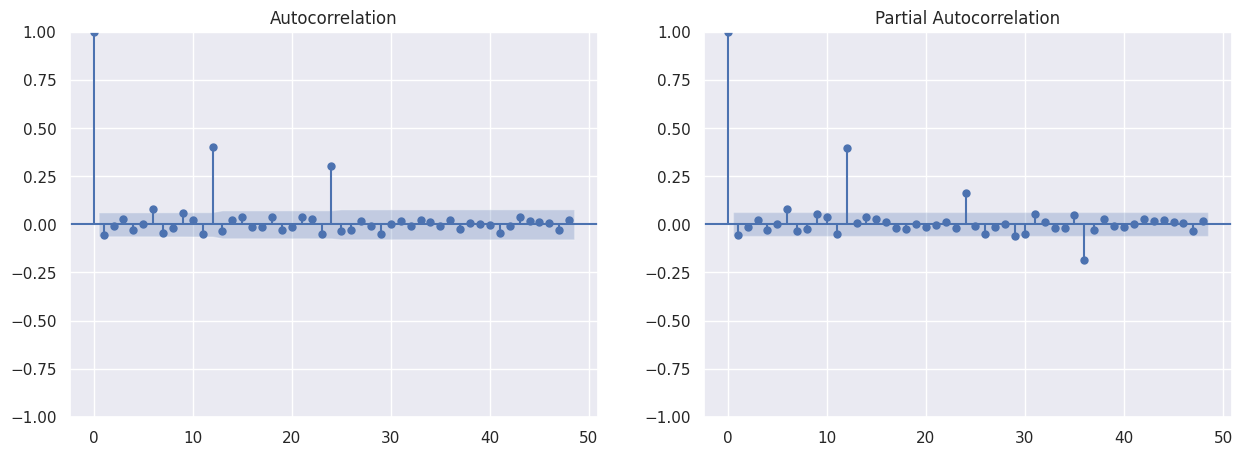

In [51]:
# Example - Simulated data for ARIMA(0,0,0)(0,0,2)12
#params = [0.85,0.15,0.05,0.15,0.5,0.5]  # check for ARIMA(0,0,0)(1,0,0)12
params = [0.4,0.4,0.4,0.4,0.4,0.4]
order = [0, 0, 0]
seasonal_order = [0, 0, 2, 12]

empty_dataset = np.zeros(1000)
model = SARIMAX(empty_dataset,order=order, seasonal_order=seasonal_order, enforce_stationary=True, enforce_invertibility=False)
simulations = model.simulate(params, 1000) # simulated data following a SARIMA process

fig, ax = plt.subplots(1, 2, figsize=(15,5))
plot_acf(simulations, lags=48, ax=ax[0]);
plot_pacf(simulations, lags=48, ax=ax[1]);

CEU7000000001
DATE                     
2001-01-01          11328
2001-02-01          11462
2001-03-01          11645
2001-04-01          11936
2001-05-01          12297
2001-06-01          12687
2001-07-01          12757

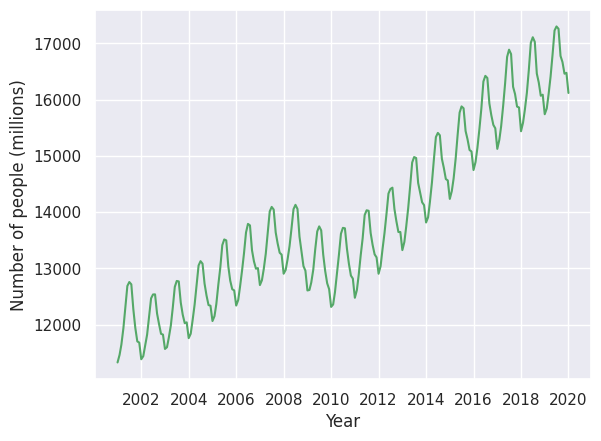

In [52]:
# Example 1 - Monthly US leisure and hospitality employment (R dataset, from Jan 2001 to Jan 2020)
data = pd.read_csv('/content/CEU7000000001.csv', na_values='',sep=',', parse_dates=['DATE'], index_col='DATE') # Employment in Leisure and Hospitality (millions)
display(data.head(7))

plt.plot(data, color='g')
plt.xlabel('Year')
plt.ylabel('Number of people (millions)');

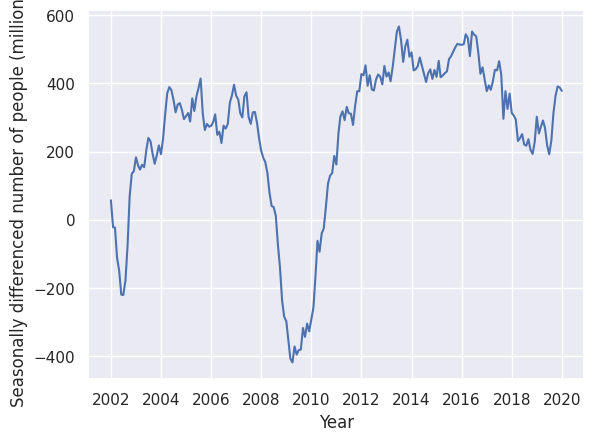

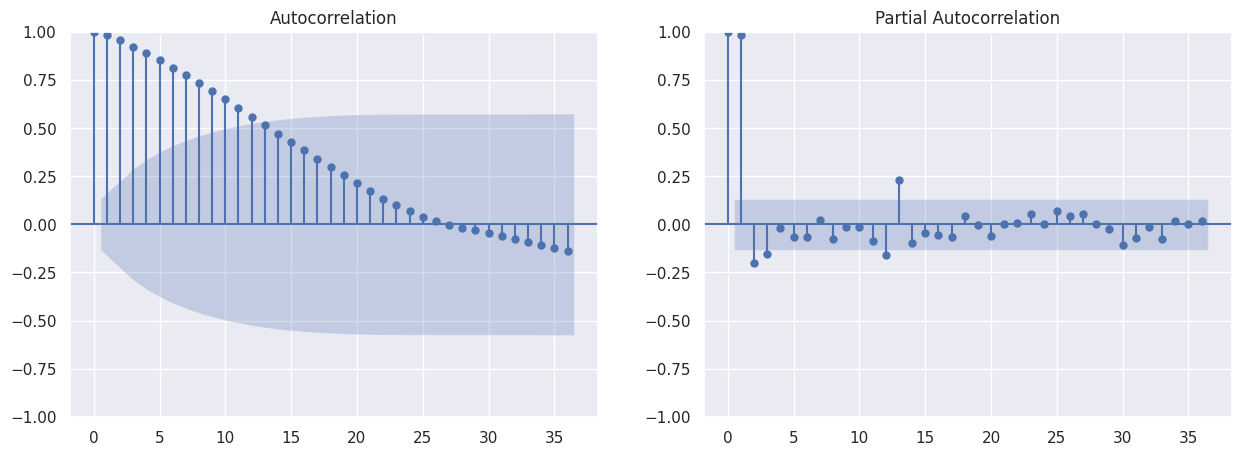

In [53]:
# Data are non-stationary, with seasonality and a non-linear trend. As first step we perfom a seasonal difference
data_diff_seas = data.diff(12)
data_diff_seas.dropna(inplace=True)
plt.plot(data_diff_seas)
plt.xlabel('Year')
plt.ylabel('Seasonally differenced number of people (millions)');

fig, ax = plt.subplots(1, 2, figsize=(15,5))
plot_acf(data_diff_seas, lags=36, ax=ax[0]);
plot_pacf(data_diff_seas, lags=36, ax=ax[1]);

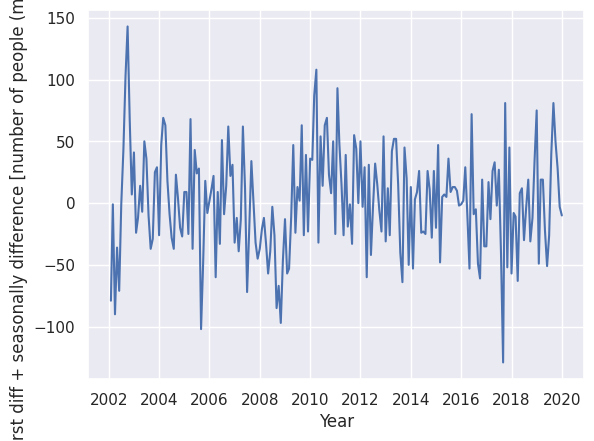

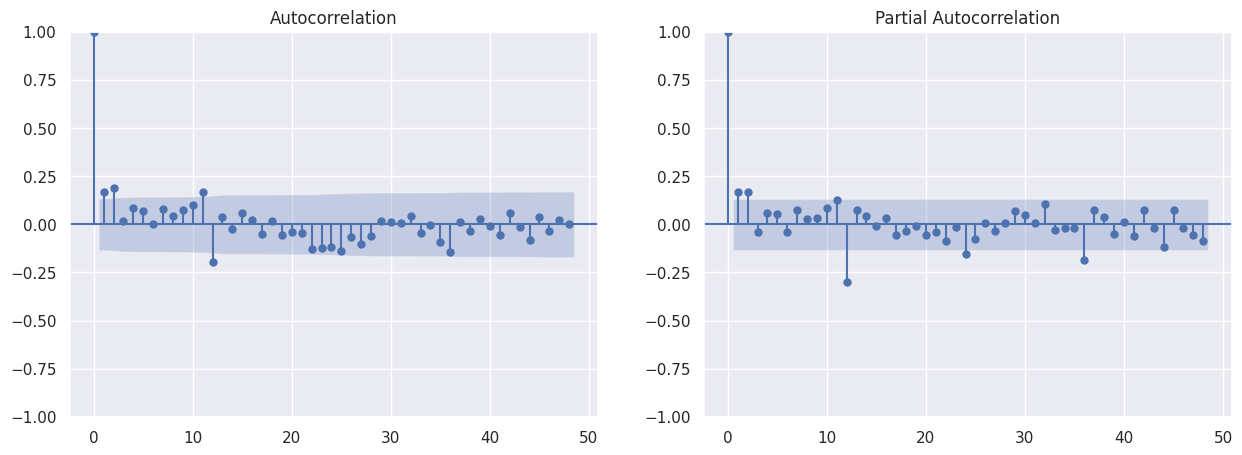

In [54]:
# Data are still non-stationary (try ADF/KPSS to double check), thus we apply a first difference
data_diff_seas_first = data_diff_seas.diff()
data_diff_seas_first.dropna(inplace=True)
plt.plot(data_diff_seas_first)
plt.xlabel('Year')
plt.ylabel('First diff + seasonally difference [number of people (millions)]');

fig, ax = plt.subplots(1, 2, figsize=(15,5))
plot_acf(data_diff_seas_first, lags=48, ax=ax[0]);
plot_pacf(data_diff_seas_first, lags=48, ax=ax[1]);

At this point, our aim is to find an appropriate SARIMA model based on these last ACF and PACF plots:
* we first look at the non-seasonal part, verifying the significant spikes occurring in the two plots before lag 12 and their behaviour. In this case they are similar, so we can start with either ACF or PACF. If we select ACF, the significant spike at lag 2 suggests a non-seasonal MA(2) component. Conversely, if we had started with the PACF, we may have selected a non-seasonal AR(2) component;
* we then look at the seasonal part. In this case we have to verify the behaviour of the significant lags occurring at m, i.e. S (12 in this case) and their multiples (~ 2-3-4 * S). It seems the ACF plot has only one significant spike at lag 12, while in the PACF we have significant spikes at 12, 24, and 36 (tails off at seasonal lags). This suggests an MA(1) for the  seasonal part of the model. \\
Therefore, we begin with an ARIMA(0,1,2)(0,1,1)12 model, indicating a first difference, a seasonal difference, and non-seasonal MA(2) and seasonal MA(1) component. If we had started with the PACF, our initial model would have been ARIMA(2,1,0)(0,1,1)12, so only the non-seasonal part would have been different.

                                      SARIMAX Results                                       
Dep. Variable:                        CEU7000000001   No. Observations:                  229
Model:             SARIMAX(0, 1, 2)x(0, 1, [1], 12)   Log Likelihood               -1009.725
Date:                              Wed, 07 Feb 2024   AIC                           2027.450
Time:                                      15:28:43   BIC                           2040.663
Sample:                                  01-01-2001   HQIC                          2032.797
                                       - 01-01-2020                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.1923      0.059      3.271      0.001       0.077       0.308
ma.L2          0.17

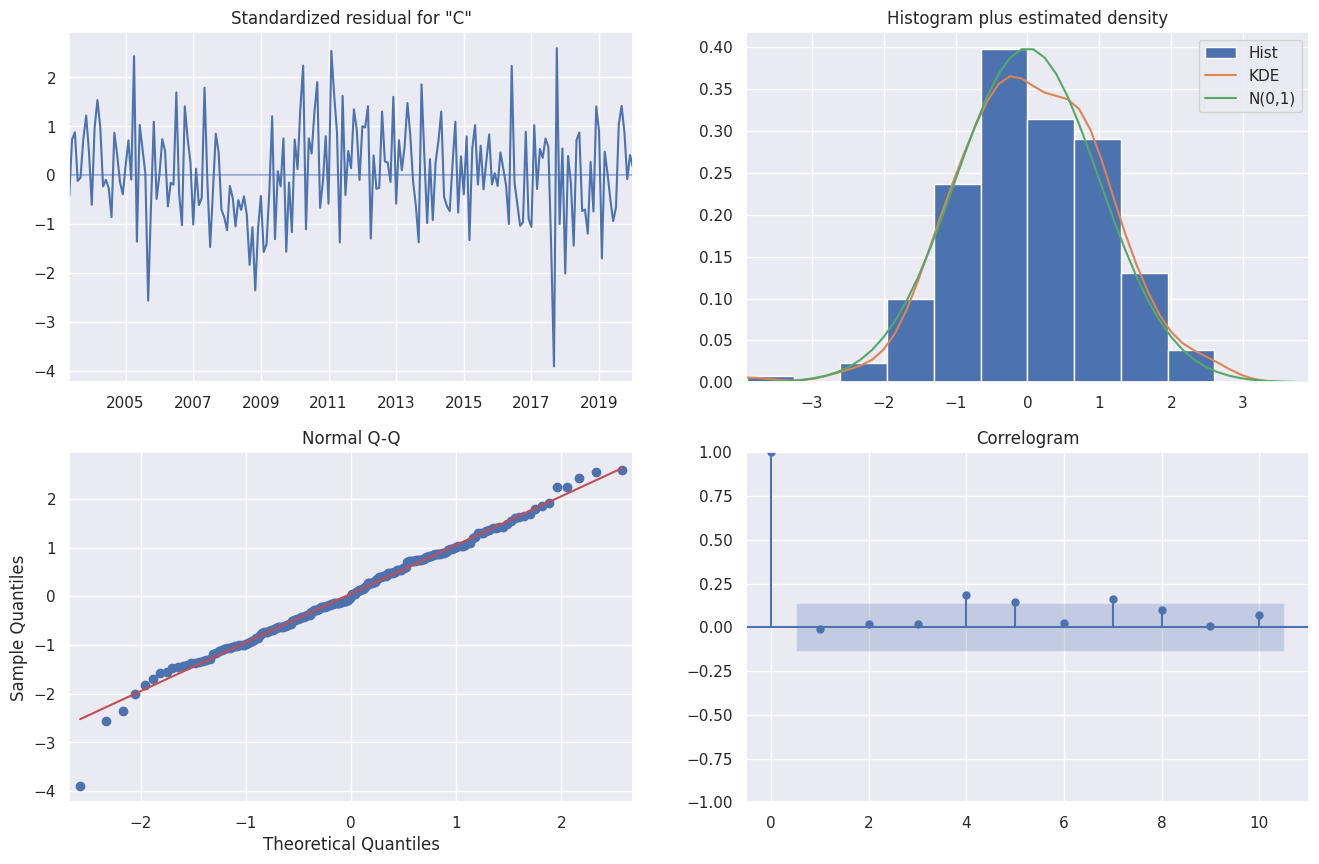

In [55]:
# Fit the model with the selected parameters - Manual SARIMA model
[p,d,q] = [0,1,2]
[P,D,Q,S] = [0,1,1,12]
model_SARIMA = SARIMAX(data,
                       order=(p,d,q),
                       seasonal_order=(P,D,Q,S),
                       enforce_stationarity=False,
                       enforce_invertibility=False) # trend = str{‘n’,’c’,’t’,’ct’}, default none
result_SARIMA = model_SARIMA.fit()

# Verify the residuals
print(result_SARIMA.summary())
result_SARIMA.plot_diagnostics(figsize=(16, 10));


 ARIMA(0,1,0)(0,1,0)[12]             : AICC=2227.978, Time=0.04 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AICC=2210.433, Time=0.33 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AICC=2201.353, Time=0.96 sec
 ARIMA(0,1,0)(0,1,3)[12]             : AICC=2200.175, Time=2.15 sec
 ARIMA(0,1,0)(0,1,4)[12]             : AICC=2209.919, Time=18.55 sec
 ARIMA(0,1,0)(0,1,5)[12]             : AICC=2203.137, Time=8.16 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AICC=2219.897, Time=0.25 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AICC=2200.334, Time=0.65 sec
 ARIMA(0,1,0)(1,1,2)[12]             : AICC=2201.802, Time=1.73 sec
 ARIMA(0,1,0)(1,1,3)[12]             : AICC=2201.570, Time=3.56 sec
 ARIMA(0,1,0)(1,1,4)[12]             : AICC=2202.094, Time=9.99 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AICC=2214.853, Time=0.54 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AICC=2201.415, Time=1.60 sec
 ARIMA(0,1,0)(2,1,2)[12]             : AICC=2204.446, Time=4.33 sec
 ARIMA(0,1,0)(2,1,3)[12]             : AICC=220

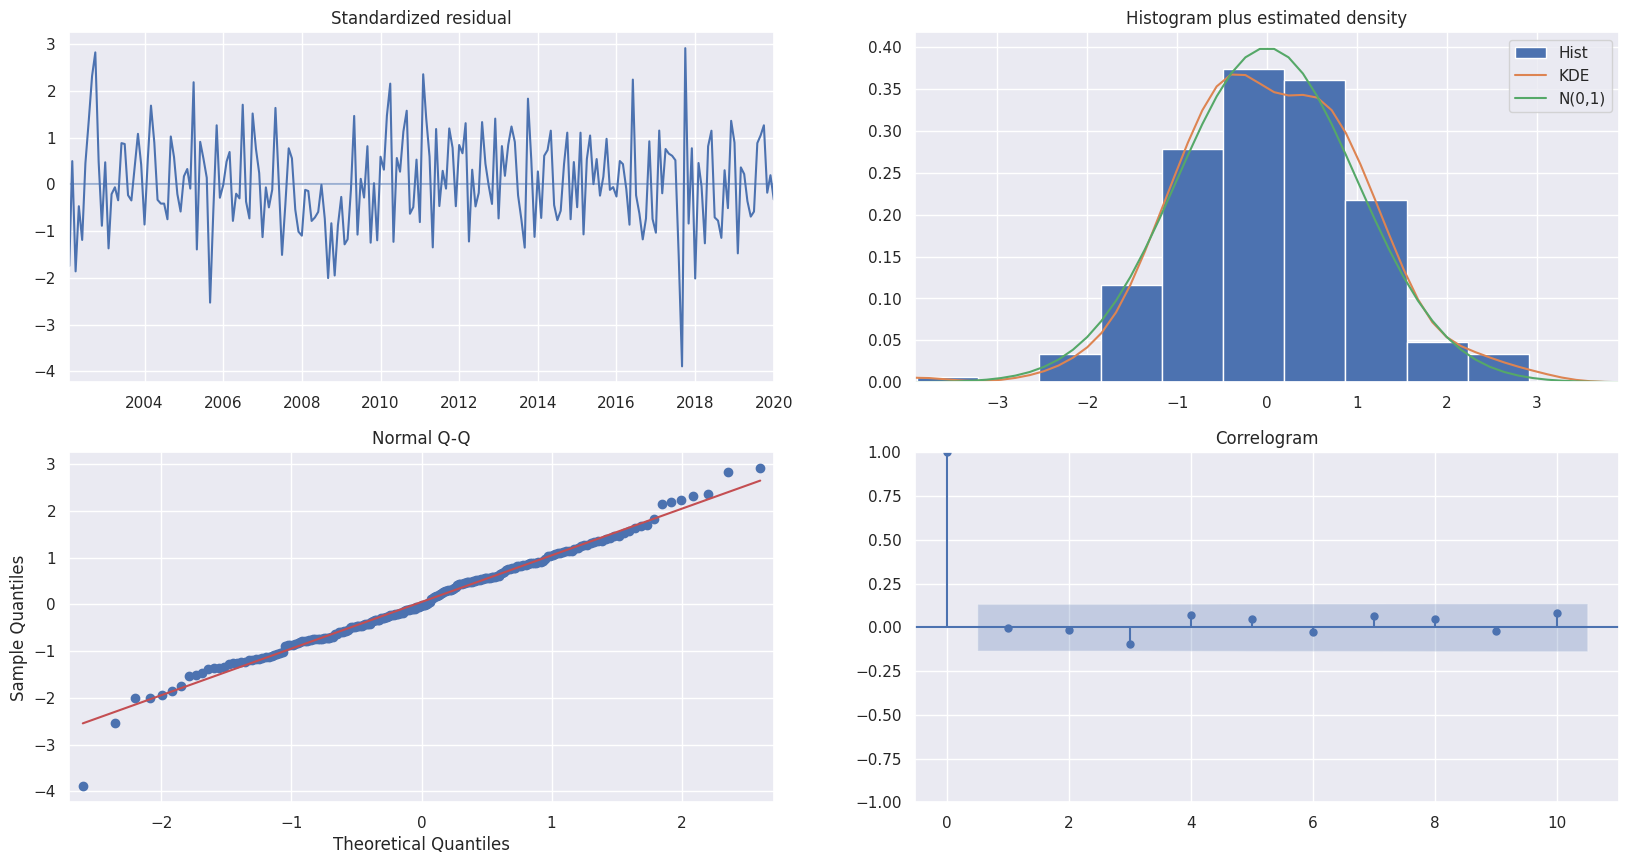

In [59]:
# Possibility to detect automatically the optimal combination of parameters, in this case minimising the AICc
!pip install pmdarima
from pmdarima.arima import auto_arima

stepwise_model = auto_arima(data, start_p=0, start_q=0, d=1,
                           max_p=5, max_q=5, m=12,
                           start_P=0, start_Q=0,max_P = 5, max_Q = 5, D = 1, seasonal=True,
                           trace=True, information_criterion='aicc',
                           error_action='ignore',
                           suppress_warnings=True,
                           stepwise=False)

print(stepwise_model.summary())
stepwise_model.plot_diagnostics(figsize=(20,10));

#This results in an ARIMA(2,1,0)(0,1,3)[12] model as optimal (~4 min)

In [6]:
import matplotlib as plt
import matplotlib.pyplot as plt

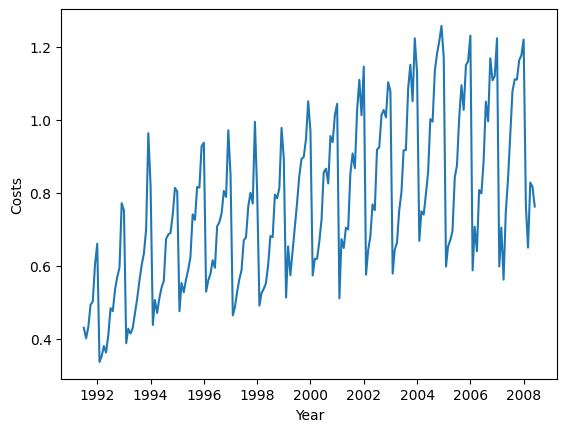

In [7]:
# Example 2 - Monthly corticosteroid drug subsidy in Australia (R dataset, from Jul 1991 to June 2008)
drug_dataset = sm.datasets.get_rdataset('h02','fpp2')
drug = pd.Series(drug_dataset.data['value']) # Monthly government expenditure (millions of dollars)
drug.index = pd.date_range(start = '1991-07', periods = len(drug), freq = "M").to_period()
drug.index = drug.index.to_timestamp()
plt.plot(drug)
plt.xlabel('Year')
plt.ylabel('Costs');

In [8]:
# Train and test (July 2006 - June 2008 as test)
data_train = drug[:-24]
data_test = drug[-24:]

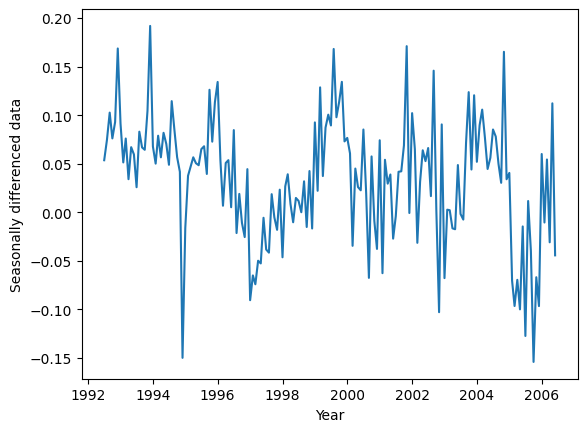

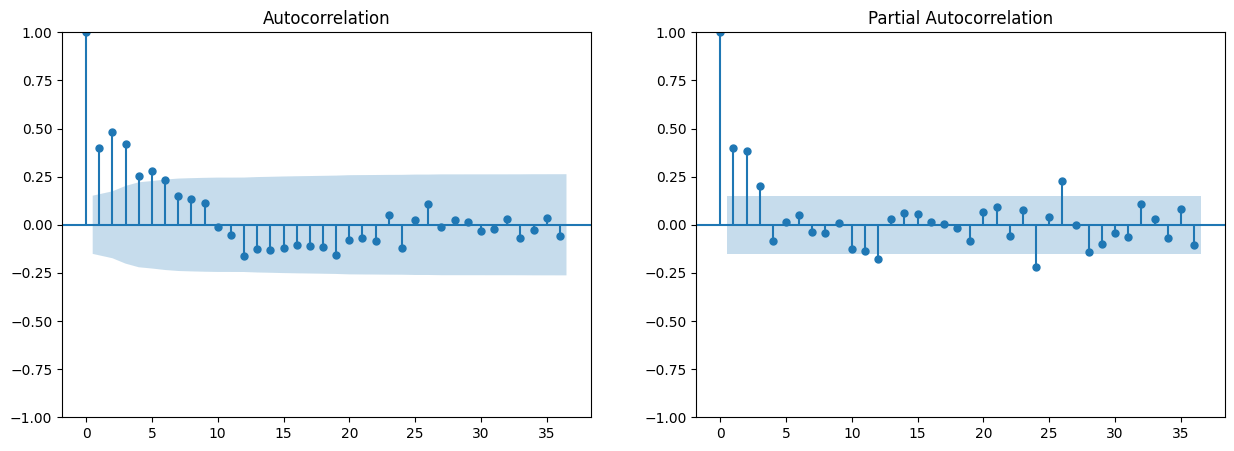

In [9]:
# The data are strongly seasonal and non-stationary, so seasonal differencing will be used as first step
data_diff_seas_train = data_train.diff(12)
data_diff_seas_train.dropna(inplace=True)
plt.plot(data_diff_seas_train)
plt.xlabel('Year')
plt.ylabel('Seasonally differenced data');

fig, ax = plt.subplots(1, 2, figsize=(15,5))
plot_acf(data_diff_seas_train, lags=36, ax=ax[0]);
plot_pacf(data_diff_seas_train, lags=36, ax=ax[1]);

In [10]:
# Test for checking stationarity
result_ADF = adfuller(data_diff_seas_train)
print('ADF Statistic:', result_ADF[0])
print('ADF p-value:', result_ADF[1])

kpss_test = kpss(data_diff_seas_train, regression='ct', nlags='auto', store=True)
print('KPSS Statistic:', kpss_test[0])
print('p-value: ', kpss_test[1])

# Time series is stationary -> no further differencing on the data

ADF Statistic: -3.5954031628371457
ADF p-value: 0.005849519978851033
KPSS Statistic: 0.08858043801698325
p-value:  0.1


                                     SARIMAX Results                                      
Dep. Variable:                              value   No. Observations:                  180
Model:             SARIMAX(3, 0, 0)x(2, 1, 0, 12)   Log Likelihood                 225.327
Date:                            Fri, 09 Feb 2024   AIC                           -438.655
Time:                                    12:49:00   BIC                           -420.962
Sample:                                07-01-1991   HQIC                          -431.465
                                     - 06-01-2006                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1183      0.078      1.515      0.130      -0.035       0.271
ar.L2          0.4446      0.078   

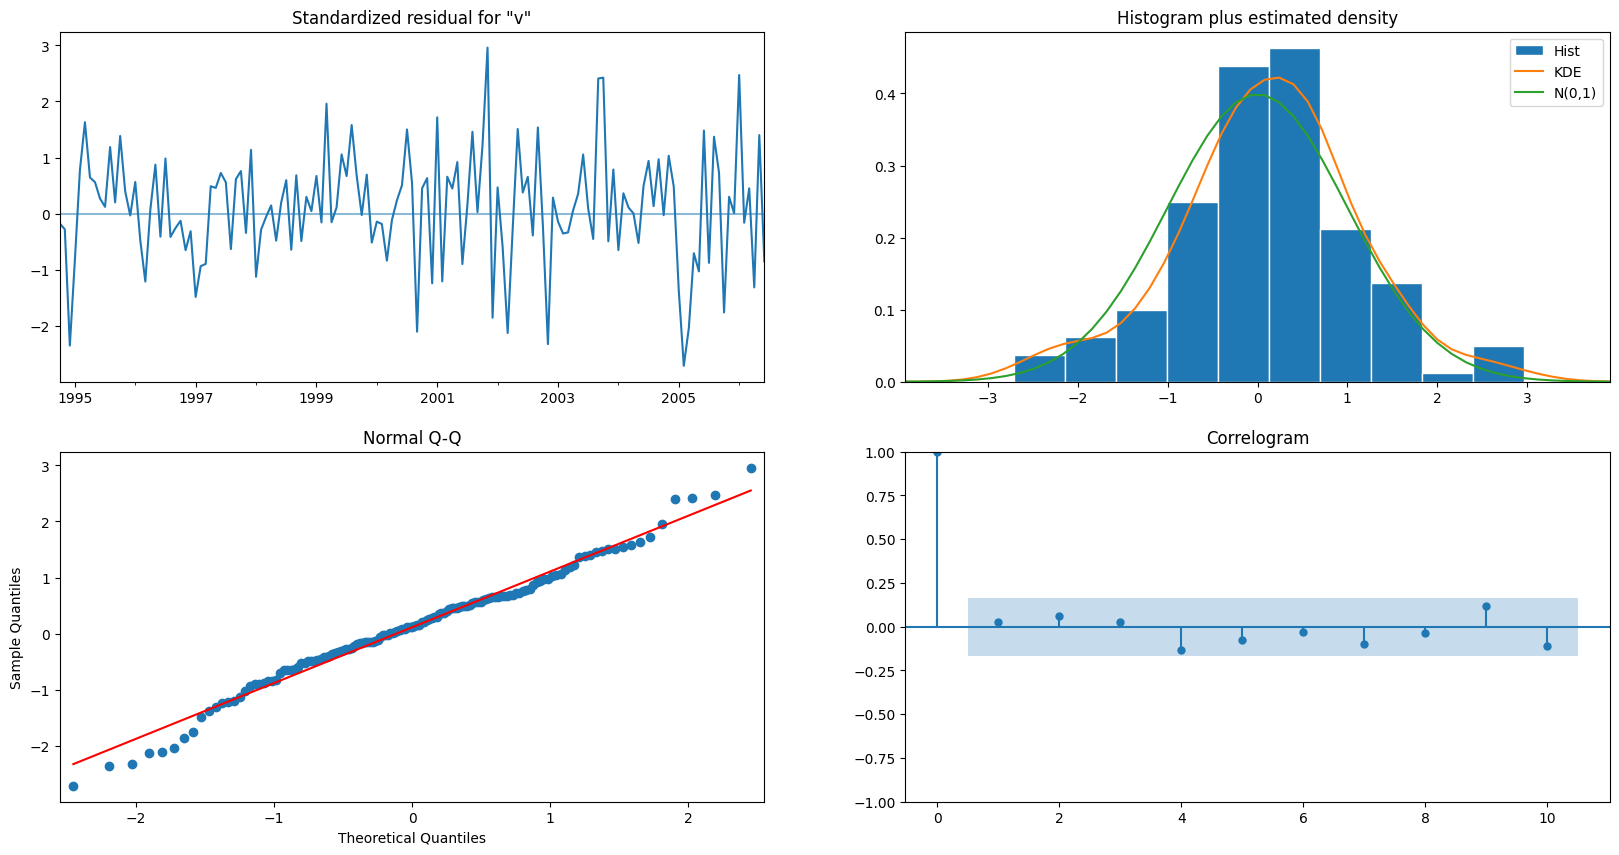

In [11]:
# Fit the model with the selected parameters - Manual SARIMA model
[p,d,q] = [3,0,0]
[P,D,Q,S] = [2,1,0,12]
model_SARIMA = SARIMAX(data_train,
                       order=(p,d,q),
                       seasonal_order=(P,D,Q,S),
                       enforce_stationarity=False,
                       enforce_invertibility=False)
result_SARIMA = model_SARIMA.fit()

# Verify the residuals
print(result_SARIMA.summary())
result_SARIMA.plot_diagnostics(figsize=(20,10));


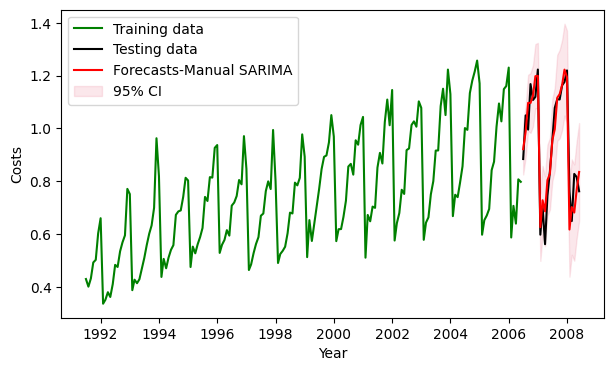

In [12]:
# Forecasting with Manual SARIMA model - Test set
model = result_SARIMA.get_prediction(start=data_test.index[0], end=data_test.index[-1])
df_manual = model.summary_frame()

plt.figure(figsize=(7, 4))
plt.plot(data_train, color='green',label='Training data')
plt.plot(data_test, color='black', label='Testing data')
plt.plot(df_manual['mean'], color='red', label='Forecasts-Manual SARIMA')
plt.fill_between(df_manual.index, df_manual['mean_ci_lower'], df_manual['mean_ci_upper'], alpha=.1, color='crimson', label='95% CI')
plt.xlabel('Year')
plt.ylabel('Costs')
plt.legend();


In [13]:
# Model performance
print('Manual SARIMA model')
print('MAE :', mean_absolute_error(data_test,df_manual['mean']))
print('RMSE:', np.sqrt(mean_squared_error(data_test,df_manual['mean'])))
print('MAPE :', 100*mean_absolute_percentage_error(data_test,df_manual['mean']))


Manual SARIMA model
MAE : 0.05342032127122609
RMSE: 0.067904978613855
MAPE : 6.358958284501613


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 7.0 MB/s eta 0:00:00
Performing stepwise search to minimize aicc
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AICC=-446.283, Time=0.09 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AICC=-475.295, Time=0.71 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AICC=-469.390, Time=0.80 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AICC=-405.656, Time=0.07 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AICC=-473.736, Time=0.11 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AICC=-486.838, Time=3.62 sec
 ARIMA(1,0,0)(3,1,0)[12] intercept   : AICC=-493.606, Time=5.51 sec
 ARIMA(1,0,0)(4,1,0)[12] intercept   : AICC=-498.727, Time=13.79 sec
 ARIMA(1,0,0)(4,1,1)[12] intercept   : AICC=-497.300, Time=15.29 sec
 ARIMA(1,0,0)(3,1,1)[12] intercept   : AICC=-497.240, Time=9.54 sec
 ARIMA(0,0,0)(4,1,0)[12] intercept   : AICC=-459.063, Time=5.87 sec
 ARIMA(2,0,0)(4,1,0)[12] intercept   : AICC=-523.509, Time=16.71 sec
 ARIMA(2,0,0)(3,1,0)[12] intercept   : AICC=-520.549, Time=

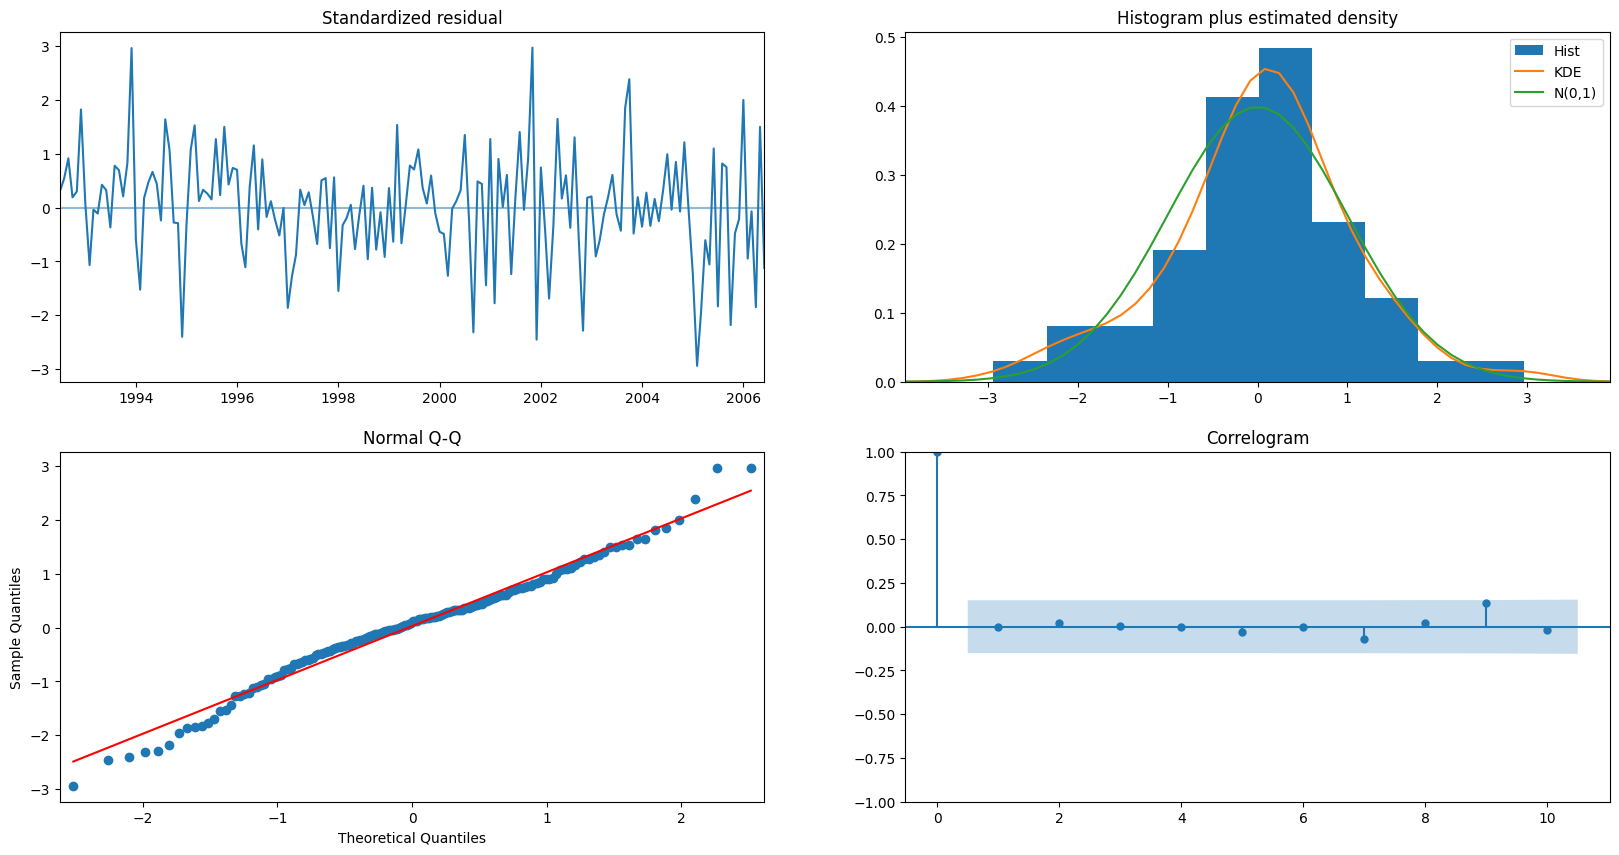

In [14]:
# Automatic SARIMA algorithm - auto_arima
!pip install pmdarima
from pmdarima.arima import auto_arima

stepwise_model = auto_arima(data_train, start_p=0, start_q=0, d=0,
                           max_p=4, max_q=4, m=12,
                           start_P=0, start_Q=0,max_P = 4, max_Q = 4, D = 1, seasonal=True,
                           trace=True, information_criterion='aicc',
                           error_action='ignore',
                           suppress_warnings=True,
                           stepwise=True) # stepwise = False will search for more models, increasing the computational time

print(stepwise_model.summary())
stepwise_model.plot_diagnostics(figsize=(20,10));

# This results in an ARIMA(4,0,0)(4,1,0)[12] model as optimal (~5 min)

                                     SARIMAX Results                                      
Dep. Variable:                              value   No. Observations:                  180
Model:             SARIMAX(4, 0, 0)x(4, 1, 0, 12)   Log Likelihood                 184.614
Date:                            Fri, 09 Feb 2024   AIC                           -351.227
Time:                                    12:56:45   BIC                           -326.445
Sample:                                07-01-1991   HQIC                          -341.167
                                     - 06-01-2006                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2034      0.094      2.171      0.030       0.020       0.387
ar.L2          0.5160      0.109   

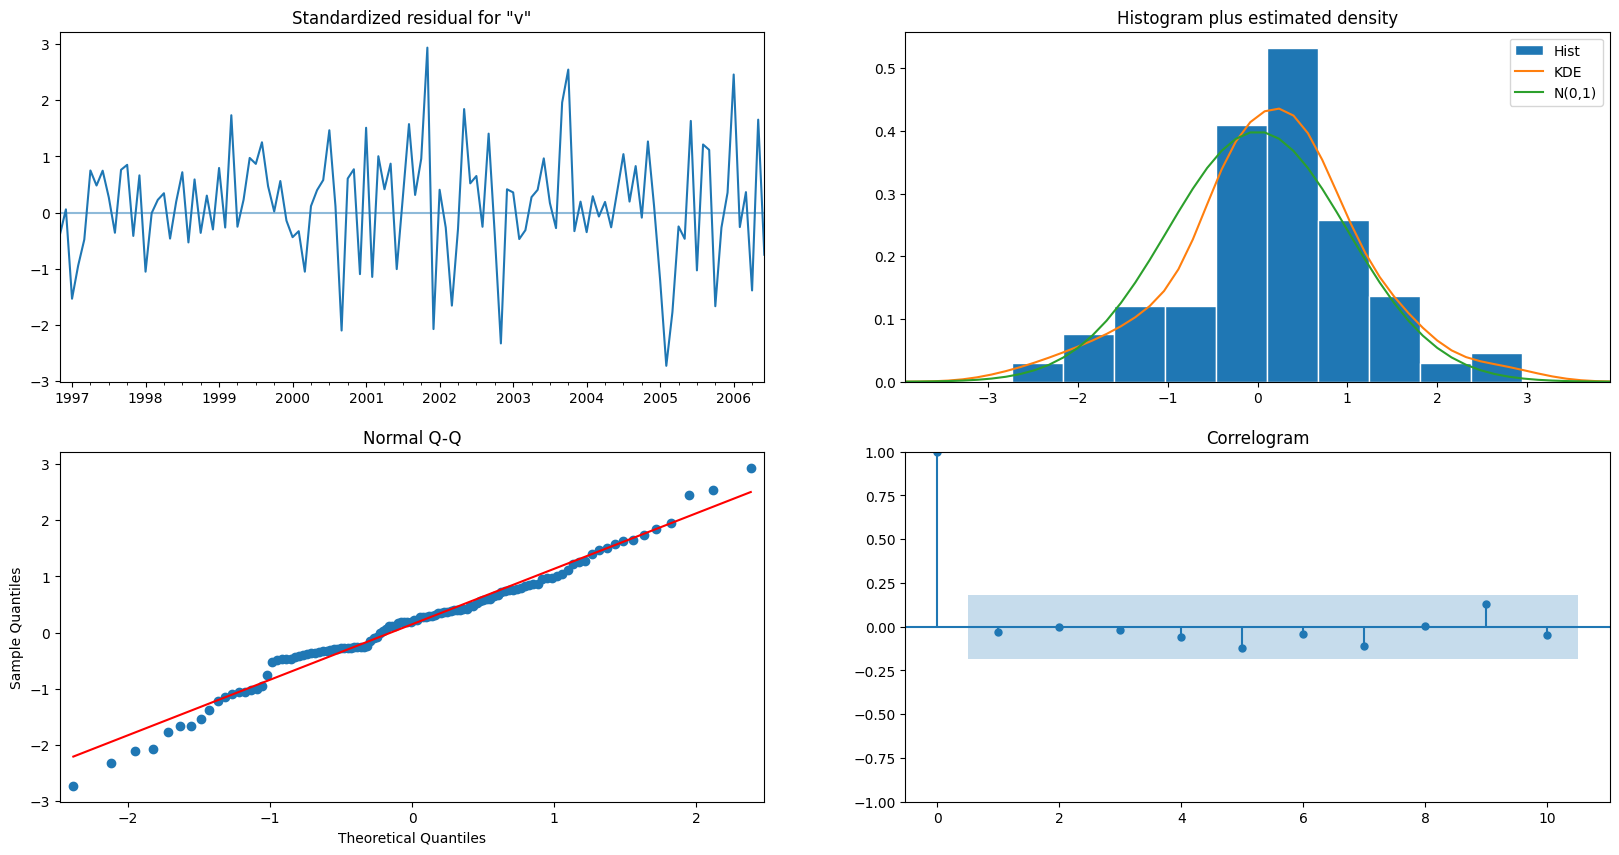

In [15]:
# Fit the model with the selected parameters - Automatic SARIMA model
[p,d,q] = [4,0,0] #[stepwise_model.order[0], stepwise_model.order[1], stepwise_model.order[2]]
[P,D,Q,S] = [4,1,0,12] #[stepwise_model.seasonal_order[0], stepwise_model.seasonal_order[1], stepwise_model.seasonal_order[2],stepwise_model.seasonal_order[3]]
model_SARIMA_auto = SARIMAX(data_train,
                       order=(p,d,q),
                       seasonal_order=(P,D,Q,S),
                       enforce_stationarity=False,
                       enforce_invertibility=False)
result_SARIMA_auto = model_SARIMA_auto.fit()

# Verify the residuals
print(result_SARIMA_auto.summary())
result_SARIMA_auto.plot_diagnostics(figsize=(20, 10));


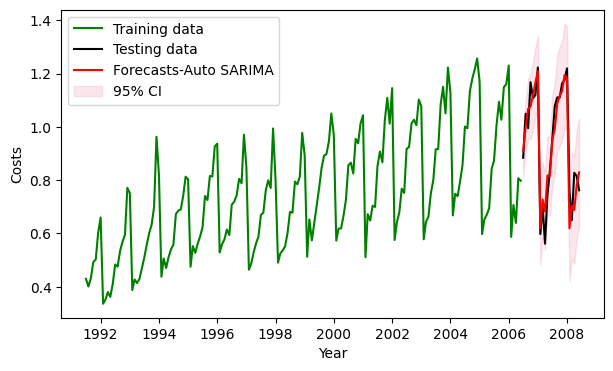

In [16]:
# Forecasting with Auto SARIMA model - Test set
model_auto = result_SARIMA_auto.get_prediction(start=data_test.index[0], end=data_test.index[-1])
df_auto = model_auto.summary_frame()

plt.figure(figsize=(7, 4))
plt.plot(data_train, color='green',label='Training data')
plt.plot(data_test, color='black', label='Testing data')
plt.plot(df_auto['mean'], color='red', label='Forecasts-Auto SARIMA')
plt.fill_between(df_auto.index, df_auto['mean_ci_lower'], df_auto['mean_ci_upper'], alpha=.1, color='crimson', label='95% CI')
plt.xlabel('Year')
plt.ylabel('Costs')
plt.legend();


In [17]:
# Model performance
print('Auto SARIMA model')
print('MAE :', mean_absolute_error(data_test,df_auto['mean']))
print('RMSE:', np.sqrt(mean_squared_error(data_test,df_auto['mean'])))
print('MAPE :', 100*mean_absolute_percentage_error(data_test,df_auto['mean']))


Auto SARIMA model
MAE : 0.05070524082311679
RMSE: 0.06446630148402803
MAPE : 6.059340897747398


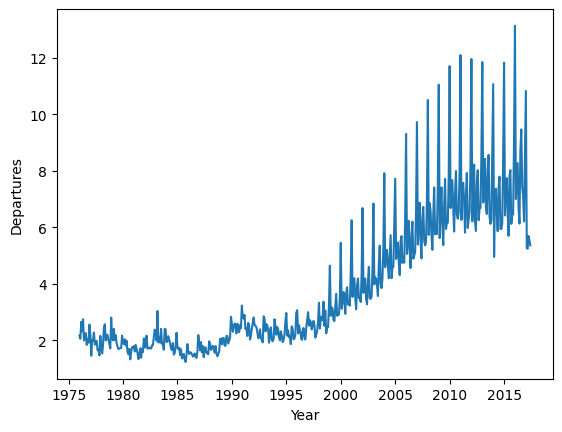

In [18]:
# Example 3 - Monthly departures from Australia (R dataset, from Jan 1976 to Jun 2017)
dep_dataset = sm.datasets.get_rdataset('departures', 'fpp2')
dep = pd.Series(dep_dataset.data['permanent']) # total (permanent) monthly departures from Australia.
dep.index = pd.date_range(start = '1976-01', periods = len(dep), freq = "M").to_period()
dep.index = dep.index.to_timestamp()

plt.plot(dep)
plt.xlabel('Year')
plt.ylabel('Departures');

In [19]:
# Train and test (Jul 2015 - Jun 2016 as separate test set)
data_train = dep[:-24]
data_test = dep[-24:]

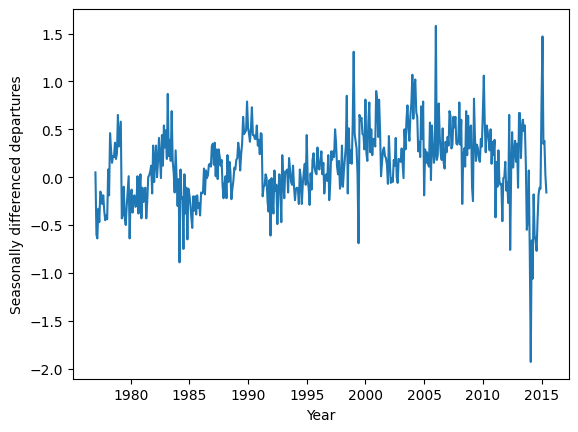

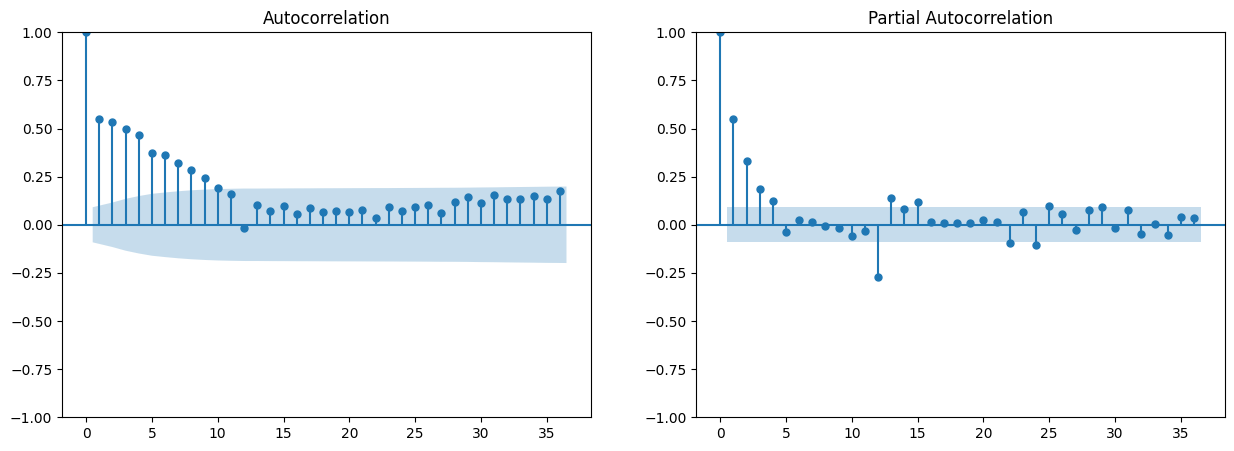

In [20]:
# Data are clearly non-stationary, with seasonality. As first step we perfom a seasonal difference
data_diff_seas_train = data_train.diff(12)
data_diff_seas_train.dropna(inplace=True)
plt.plot(data_diff_seas_train)
plt.xlabel('Year')
plt.ylabel('Seasonally differenced departures');

fig, ax = plt.subplots(1, 2, figsize=(15,5))
plot_acf(data_diff_seas_train, lags=36, ax=ax[0]);
plot_pacf(data_diff_seas_train, lags=36, ax=ax[1]);

In [21]:
# Test stationarity
result_ADF = adfuller(data_diff_seas_train)
print('ADF Statistic:', result_ADF[0])
print('ADF p-value:', result_ADF[1])

kpss_test = kpss(data_diff_seas_train, regression='ct', nlags='auto', store=True)
print('KPSS Statistic:', kpss_test[0])
print('p-value: ', kpss_test[1])

# Time series is difference stationary -> we perform further differencing on the data

ADF Statistic: -3.8046724741627562
ADF p-value: 0.002859869625045185
KPSS Statistic: 0.1726595816396202
p-value:  0.027783681966983165


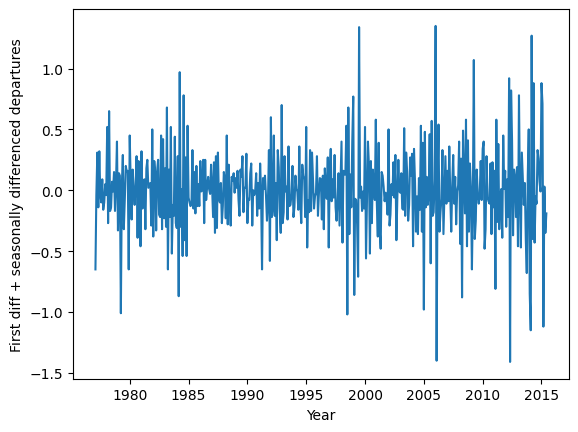

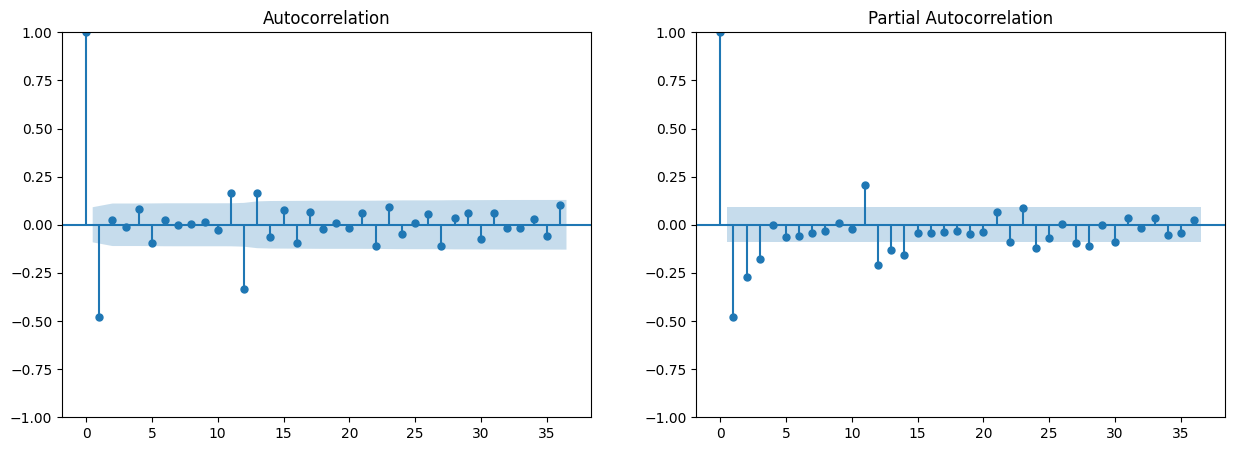

In [22]:
# First difference
data_diff_seas_first_train = data_diff_seas_train.diff()
data_diff_seas_first_train.dropna(inplace=True)
plt.plot(data_diff_seas_first_train)
plt.xlabel('Year')
plt.ylabel('First diff + seasonally differenced departures');

fig, ax = plt.subplots(1, 2, figsize=(15,5))
plot_acf(data_diff_seas_first_train, lags=36, ax=ax[0]);
plot_pacf(data_diff_seas_first_train, lags=36, ax=ax[1]);

# Possible model parameters from ACF-PACF plots:
# Seasonal part = MA(1)
# Non-seasonal part = MA(1)
# We begin with an ARIMA(0,1,1)(0,1,1)12 model

                                     SARIMAX Results                                      
Dep. Variable:                          permanent   No. Observations:                  474
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                 -58.189
Date:                            Fri, 09 Feb 2024   AIC                            122.378
Time:                                    13:01:04   BIC                            134.686
Sample:                                01-01-1976   HQIC                           127.230
                                     - 06-01-2015                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6775      0.028    -24.533      0.000      -0.732      -0.623
ma.S.L12      -0.3894      0.027   

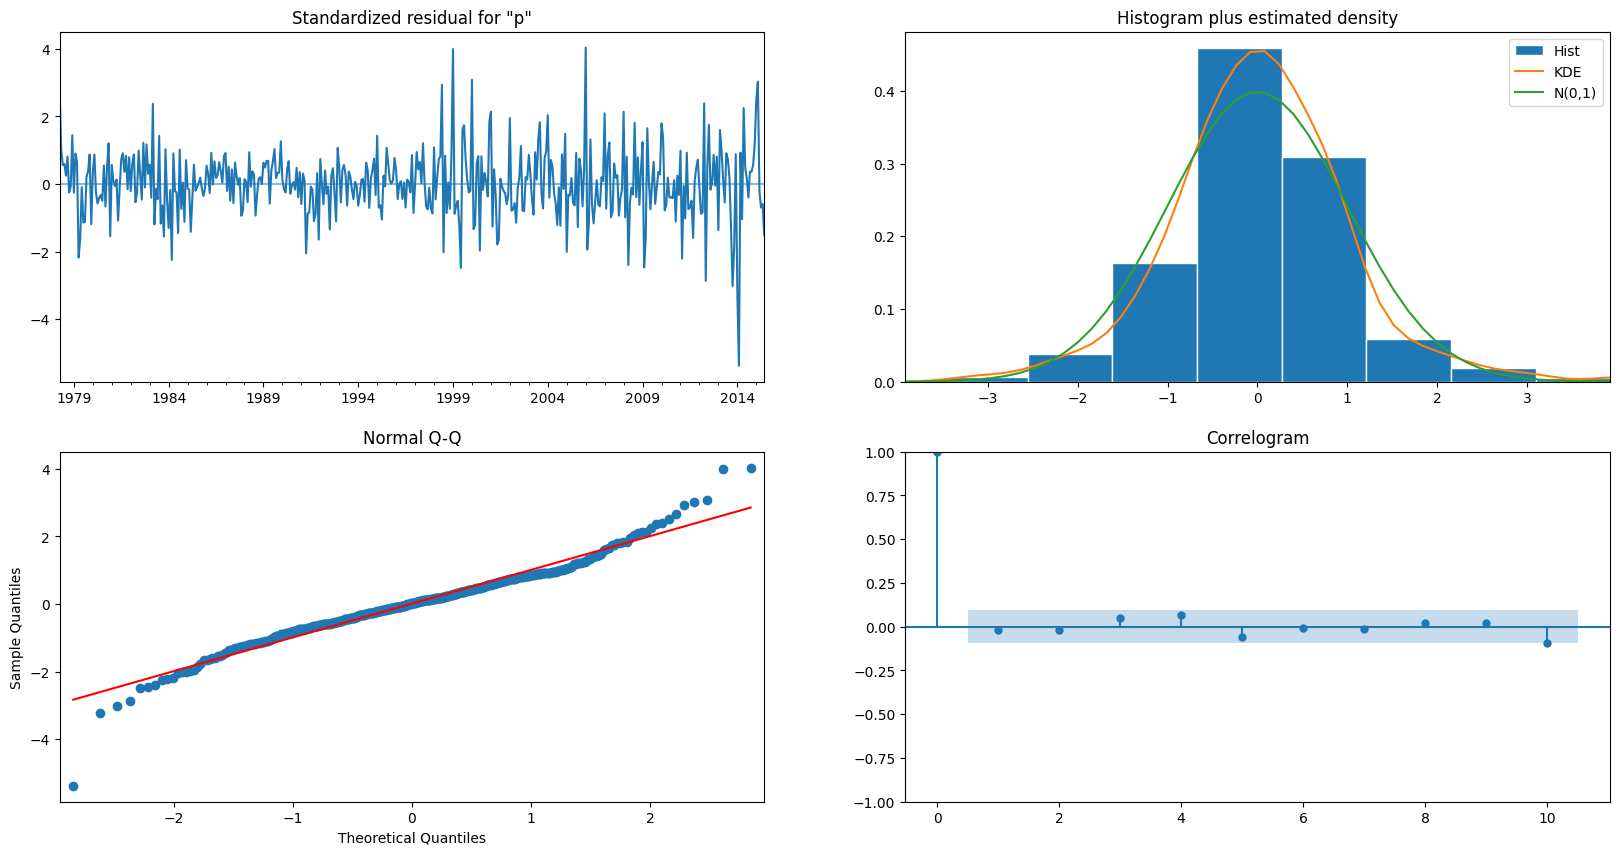

In [23]:
# Fit the model with the selected parameters - Manual SARIMA model
[p,d,q] = [0,1,1]
[P,D,Q,S] = [0,1,1,12]
model_SARIMA = SARIMAX(data_train,
                       order=(p,d,q),
                       seasonal_order=(P,D,Q,S),
                       enforce_stationarity=False,
                       enforce_invertibility=False)
result_SARIMA = model_SARIMA.fit()

# Verify the residuals
print(result_SARIMA.summary())
result_SARIMA.plot_diagnostics(figsize=(20,10));


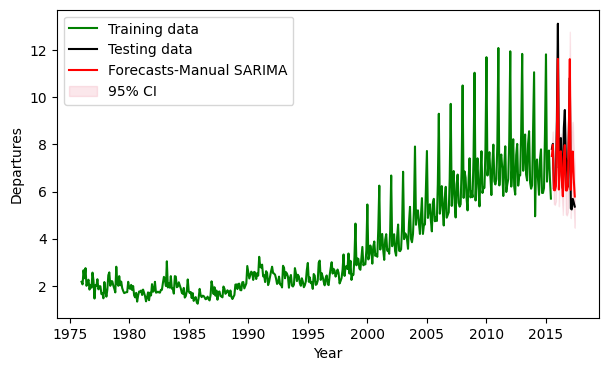

In [24]:
# Forecasting with Manual SARIMA model - Test set
model = result_SARIMA.get_prediction(start=data_test.index[0], end=data_test.index[-1])
df_manual = model.summary_frame()

plt.figure(figsize=(7, 4))
plt.plot(data_train, color='green',label='Training data')
plt.plot(data_test, color='black', label='Testing data')
plt.plot(df_manual['mean'], color='red', label='Forecasts-Manual SARIMA')
plt.fill_between(df_manual.index, df_manual['mean_ci_lower'], df_manual['mean_ci_upper'], alpha=.1, color='crimson', label='95% CI')
plt.xlabel('Year')
plt.ylabel('Departures')
plt.legend();


In [25]:
# Model performance
print('Manual SARIMA model')
print('MAE :', mean_absolute_error(data_test,df_manual['mean']))
print('RMSE:', np.sqrt(mean_squared_error(data_test,df_manual['mean'])))
print('MAPE :', 100*mean_absolute_percentage_error(data_test,df_manual['mean']))


Manual SARIMA model
MAE : 0.7340231752043992
RMSE: 0.9522785762939102
MAPE : 10.456347732898685


Performing stepwise search to minimize aicc
 ARIMA(0,1,0)(0,1,0)[12]             : AICC=361.597, Time=0.08 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AICC=188.776, Time=0.58 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AICC=121.203, Time=1.12 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AICC=190.344, Time=0.25 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AICC=121.324, Time=1.70 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AICC=120.075, Time=3.26 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AICC=100.769, Time=8.11 sec
 ARIMA(0,1,1)(2,1,2)[12]             : AICC=99.216, Time=17.82 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AICC=118.621, Time=1.90 sec
 ARIMA(0,1,1)(3,1,2)[12]             : AICC=inf, Time=16.33 sec
 ARIMA(0,1,1)(2,1,3)[12]             : AICC=inf, Time=23.12 sec
 ARIMA(0,1,1)(1,1,3)[12]             : AICC=99.976, Time=13.16 sec
 ARIMA(0,1,1)(3,1,1)[12]             : AICC=inf, Time=12.30 sec
 ARIMA(0,1,1)(3,1,3)[12]             : AICC=inf, Time=25.02 sec
 ARIMA(0,1,0)(2,1,2)[12]      

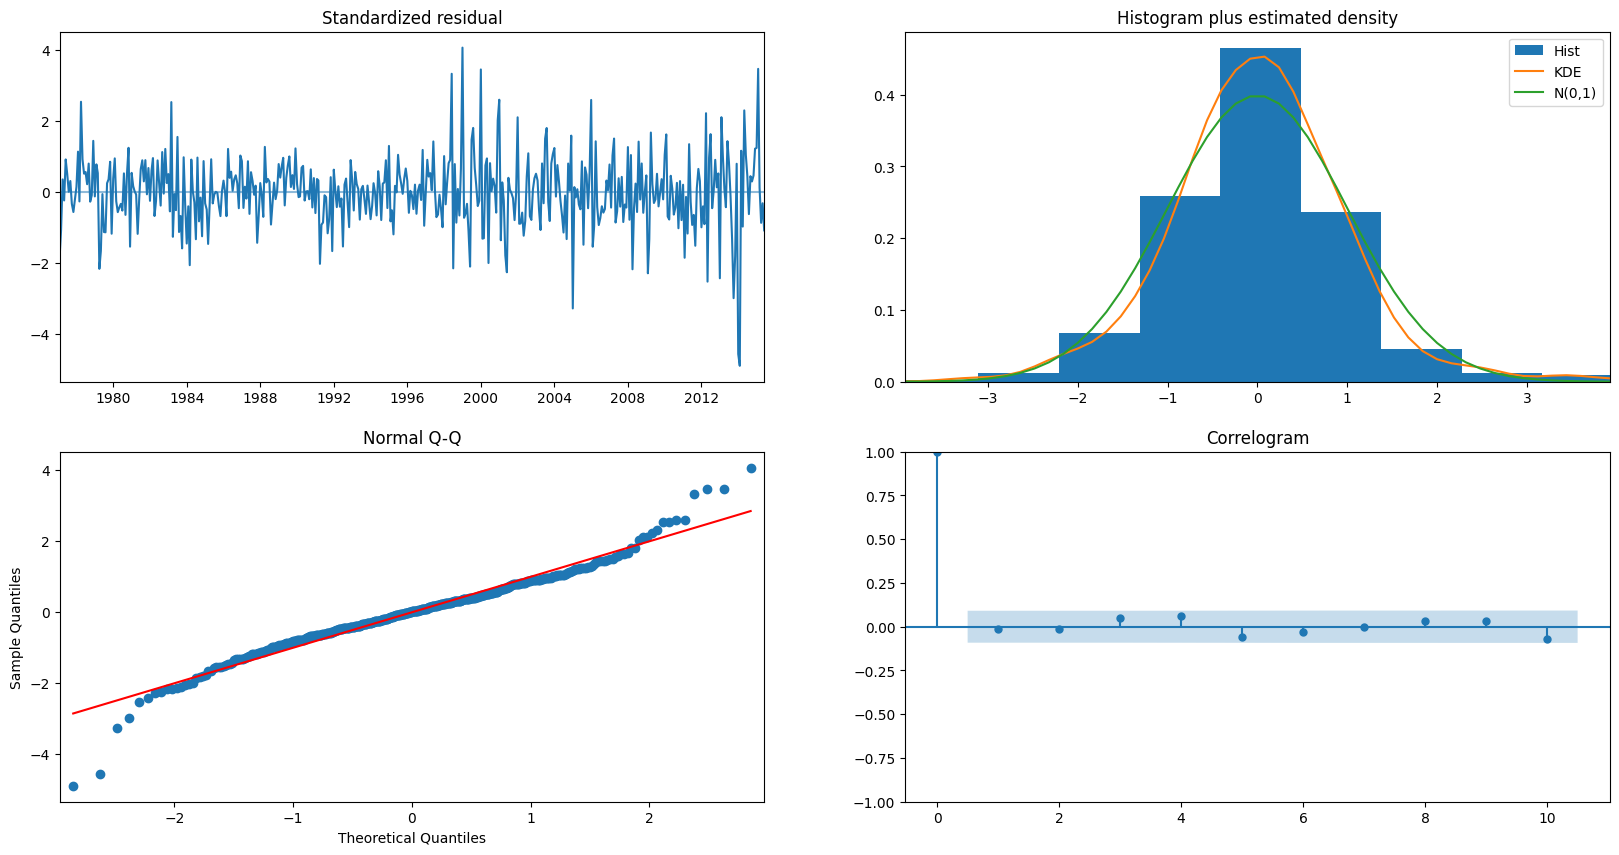

In [26]:
# Automatic SARIMA algorithm - auto_arima
Auto_SARIMA_model = auto_arima(data_train, start_p=0, start_q=0, d=1,
                           max_p=4, max_q=4, m=12,
                           start_P=0, start_Q=0,max_P = 4, max_Q = 4, D = 1, seasonal=True,
                           trace=True, information_criterion='aicc',
                           error_action='ignore',
                           suppress_warnings=True,
                           stepwise=True)

print(Auto_SARIMA_model.summary())
Auto_SARIMA_model.plot_diagnostics(figsize=(20, 10));

# This results in an ARIMA(0,1,1)(2,1,2)[12] model as optimal (~3 min)

                                        SARIMAX Results                                        
Dep. Variable:                               permanent   No. Observations:                  474
Model:             SARIMAX(0, 1, 1)x(2, 1, [1, 2], 12)   Log Likelihood                 -51.143
Date:                                 Fri, 09 Feb 2024   AIC                            114.286
Time:                                         13:05:40   BIC                            138.739
Sample:                                     01-01-1976   HQIC                           123.937
                                          - 06-01-2015                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6880      0.029    -23.646      0.000      -0.745      -0

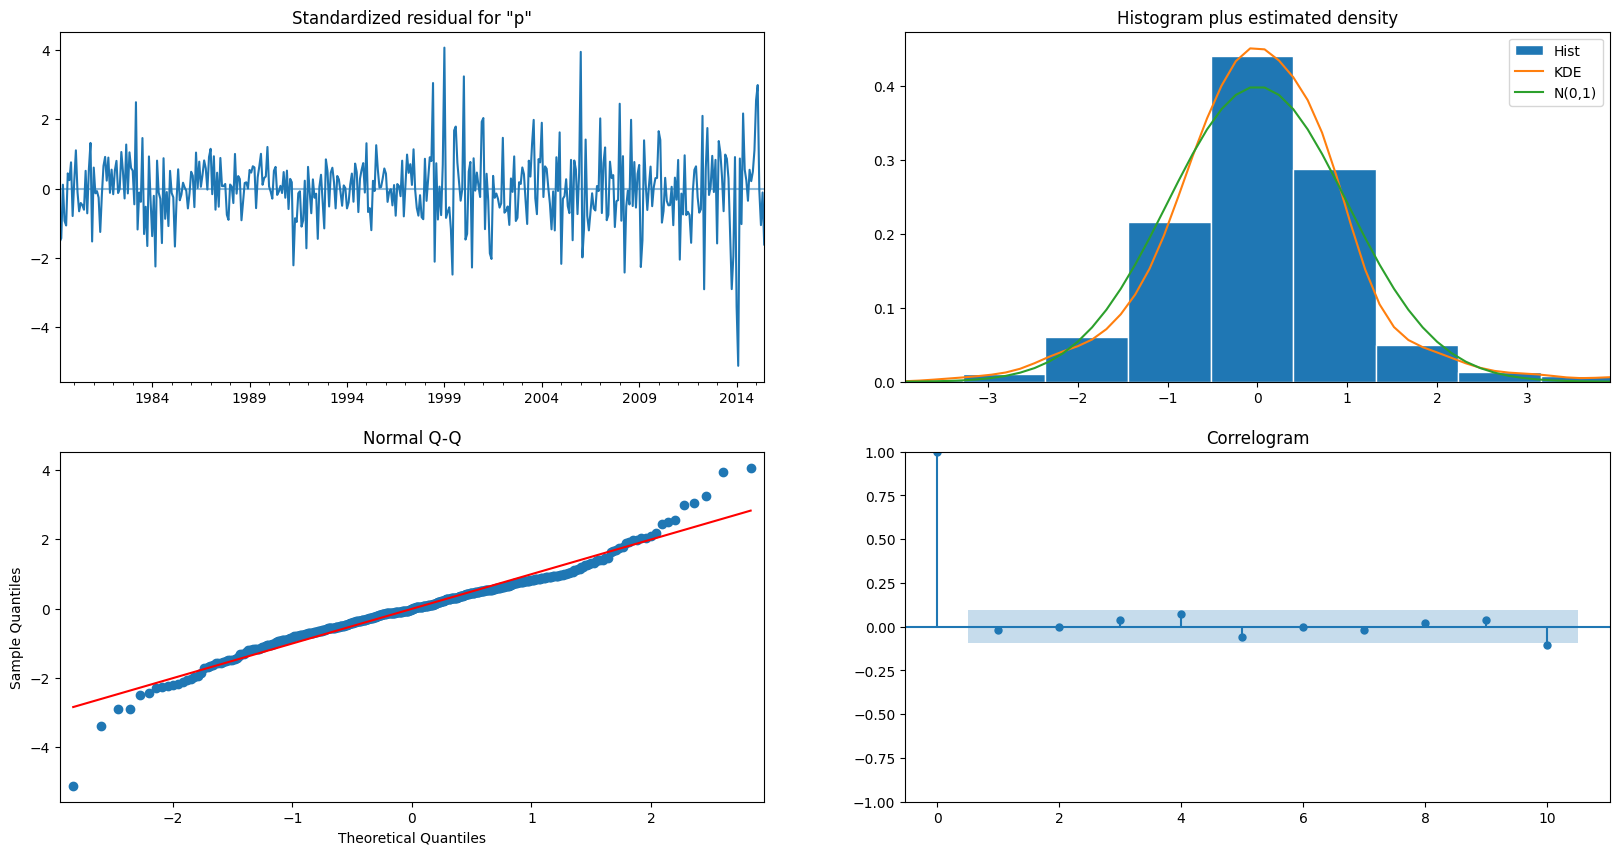

In [27]:
# Fit the model with the selected parameters - Auto SARIMA model
[p,d,q] = [0,1,1]
[P,D,Q,S] = [2,1,2,12]
model_SARIMA_auto = SARIMAX(data_train,
                       order=(p,d,q),
                       seasonal_order=(P,D,Q,S),
                       enforce_stationarity=False,
                       enforce_invertibility=False)
result_SARIMA_auto = model_SARIMA_auto.fit()

# Verify the residuals
print(result_SARIMA_auto.summary())
result_SARIMA_auto.plot_diagnostics(figsize=(20,10));


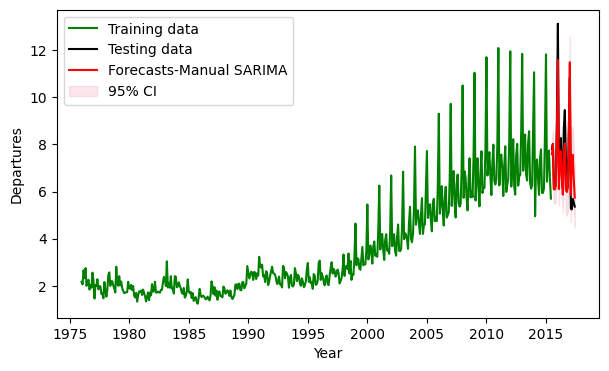

In [28]:
# Forecasting with Manual SARIMA model - Test set
model = result_SARIMA_auto.get_prediction(start=data_test.index[0], end=data_test.index[-1])
df_auto = model.summary_frame()

plt.figure(figsize=(7, 4))
plt.plot(data_train, color='green',label='Training data')
plt.plot(data_test, color='black', label='Testing data')
plt.plot(df_auto['mean'], color='red', label='Forecasts-Manual SARIMA')
plt.fill_between(df_auto.index, df_auto['mean_ci_lower'], df_auto['mean_ci_upper'], alpha=.1, color='crimson', label='95% CI')
plt.xlabel('Year')
plt.ylabel('Departures')
plt.legend();


In [29]:
# Model performance
print('Auto SARIMA model')
print('MAE :', mean_absolute_error(data_test,df_auto['mean']))
print('RMSE:', np.sqrt(mean_squared_error(data_test,df_auto['mean'])))
print('MAPE :', 100*mean_absolute_percentage_error(data_test,df_auto['mean']))


Auto SARIMA model
MAE : 0.6897938403918333
RMSE: 0.9145824463298567
MAPE : 9.791249560161951


In [30]:
# Additional alternative: Grid search for finding the optimal parameters for the SARIMA model
import itertools

def sarima_parameter_search(search_range, seasonal, d, D): #  parameter combinations for a SARIMA model

    p = range(0, search_range)
    q = range(0, search_range)
    non_seasonal_pdq = list(itertools.product(p,d,q))
    P = p
    Q = q
    seasonal_pdq = [(x[0], x[1], x[2], x[3]) for x in list(itertools.product(P, D, Q, seasonal))]
    return non_seasonal_pdq, seasonal_pdq

non_seasonal_order, seasonal_order = sarima_parameter_search(4,[12],[1],[1])
print('Combinations for non-seasonal part:')
display(non_seasonal_order)

print('Combinations for seasonal part:')
display(seasonal_order)



Combinations for non-seasonal part:


[(0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3, 1, 3)]

Combinations for seasonal part:


[(0, 1, 0, 12),
 (0, 1, 1, 12),
 (0, 1, 2, 12),
 (0, 1, 3, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12),
 (1, 1, 2, 12),
 (1, 1, 3, 12),
 (2, 1, 0, 12),
 (2, 1, 1, 12),
 (2, 1, 2, 12),
 (2, 1, 3, 12),
 (3, 1, 0, 12),
 (3, 1, 1, 12),
 (3, 1, 2, 12),
 (3, 1, 3, 12)]

In [31]:
# This part is a bit computational intensive especially when the number of combinations is high (~20min), so let's skip running this part for the moment (but try this section)
combinations = len(seasonal_order) * len(non_seasonal_order)
df_season = pd.DataFrame([[0,0,0,0]], columns=['P','D','Q','S'])
df_noseason = pd.DataFrame([[0,0,0]], columns=['p','d','q'])
df_AICc = pd.DataFrame([[0]], columns=['AICc'])
idx = 1
for order_non_seas in non_seasonal_order:
    for order_seas in seasonal_order:
            model = SARIMAX(data_train,
                            order=order_non_seas,
                            seasonal_order=order_seas,
                            enforce_stationarity=False,
                            enforce_invertibility=False)
            result = model.fit()
            table_season = order_seas
            table_noseason = order_non_seas
            AICc = result.aicc
            df_season = df_season.append(pd.DataFrame([table_season], index = [idx], columns=['P','D','Q','S']))
            df_noseason = df_noseason.append(pd.DataFrame([table_noseason], index=[idx],columns=['p','d','q']))
            df_AICc = df_AICc.append(pd.DataFrame([AICc], index=[idx], columns=['AICc']))
            print('Combination #', idx, 'out of', combinations)
            idx +=1


# Search for the minimum AICc value and corresponding indexes
temp = df_AICc[1:].idxmin()
print(df_AICc.iloc[temp['AICc']]) # AICc = 104
print(df_noseason.iloc[temp['AICc']]) # p,d,q = 0,1,1
print(df_season.iloc[temp['AICc']]) # P,D,Q,S = 1,1,3,12


Combination # 1 out of 256
Combination # 2 out of 256
Combination # 3 out of 256
Combination # 4 out of 256
Combination # 5 out of 256
Combination # 6 out of 256
Combination # 7 out of 256
Combination # 8 out of 256
Combination # 9 out of 256
Combination # 10 out of 256
Combination # 11 out of 256
Combination # 12 out of 256
Combination # 13 out of 256
Combination # 14 out of 256
Combination # 15 out of 256
Combination # 16 out of 256
Combination # 17 out of 256
Combination # 18 out of 256
Combination # 19 out of 256
Combination # 20 out of 256
Combination # 21 out of 256
Combination # 22 out of 256
Combination # 23 out of 256
Combination # 24 out of 256
Combination # 25 out of 256
Combination # 26 out of 256
Combination # 27 out of 256
Combination # 28 out of 256
Combination # 29 out of 256
Combination # 30 out of 256
Combination # 31 out of 256
Combination # 32 out of 256
Combination # 33 out of 256
Combination # 34 out of 256
Combination # 35 out of 256
Combination # 36 out of 256
C

                                         SARIMAX Results                                          
Dep. Variable:                                  permanent   No. Observations:                  474
Model:             SARIMAX(0, 1, 1)x(1, 1, [1, 2, 3], 12)   Log Likelihood                 -45.910
Date:                                    Fri, 09 Feb 2024   AIC                            103.820
Time:                                            13:29:16   BIC                            128.104
Sample:                                        01-01-1976   HQIC                           113.415
                                             - 06-01-2015                                         
Covariance Type:                                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6832      0.028    -24.524      0

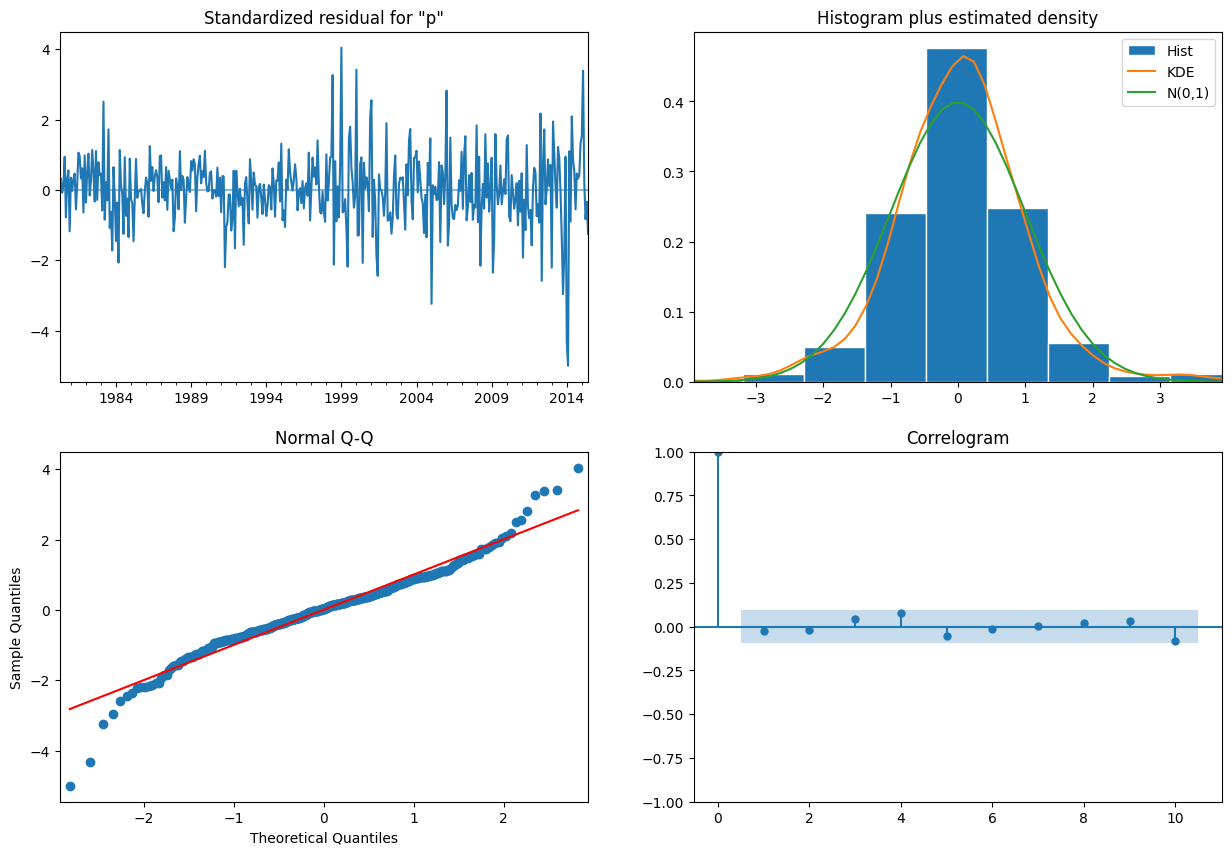

In [32]:
# Fit the model with the selected parameters from the grid search SARIMA model
[p,d,q] = [0,1,1]
[P,D,Q,S] = [1,1,3,12]
model_SARIMA_grid = SARIMAX(data_train,
                       order=(p,d,q),
                       seasonal_order=(P,D,Q,S),
                       enforce_stationarity=False,
                       enforce_invertibility=False)
result_SARIMA_grid = model_SARIMA_grid.fit()

# Verify the residuals
print(result_SARIMA_grid.summary())
result_SARIMA_grid.plot_diagnostics(figsize=(15, 10));


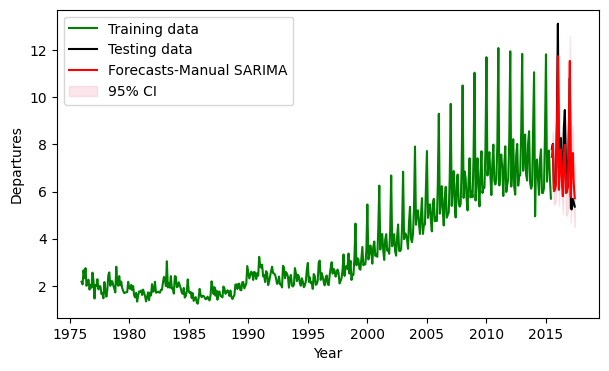

In [33]:
# Forecasting with Grid Search SARIMA model - Test set
model = result_SARIMA_grid.get_prediction(start=data_test.index[0], end=data_test.index[-1])
df_grid = model.summary_frame()

plt.figure(figsize=(7, 4))
plt.plot(data_train, color='green',label='Training data')
plt.plot(data_test, color='black', label='Testing data')
plt.plot(df_grid['mean'], color='red', label='Forecasts-Manual SARIMA')
plt.fill_between(df_grid.index, df_grid['mean_ci_lower'], df_grid['mean_ci_upper'], alpha=.1, color='crimson', label='95% CI')
plt.xlabel('Year')
plt.ylabel('Departures')
plt.legend();


In [34]:
# Model performance
print('Grid Search SARIMA model')
print('MAE :', mean_absolute_error(data_test,df_grid['mean']))
print('RMSE:', np.sqrt(mean_squared_error(data_test,df_grid['mean'])))
print('MAPE :', 100*mean_absolute_percentage_error(data_test,df_grid['mean']))


Grid Search SARIMA model
MAE : 0.7077717671047297
RMSE: 0.9151497534370695
MAPE : 9.986799392612756
